# import packages

In [6]:
##### scanpy packages 
import scanpy as sc
import scanpy.external as sce
import anndata as anndata
from anndata import AnnData
# other packages
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager

# other packages
import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
from scanpy.external.pp import magic
from scipy.stats import zscore
import scipy.cluster.hierarchy as hc
from statistics import median
import math
from typing import Union
import numpy.matlib

In [7]:
!conda list

# packages in environment at /home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
_r-mutex                  1.0.1               anacondar_1    conda-forge
alabaster                 0.7.12                     py_0    conda-forge
alsa-lib                  1.2.6.1              h7f98852_0    conda-forge
anndata                   0.8.0           py310hff52083_0    conda-forge
anyio                     3.6.1           py310hff52083_0    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_2    conda-forge
arpack                    3.7.0                hdefa2d7_2    conda-forge
asttokens                 2.0.5            

In [8]:
DATA_DIR = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/'
fig_save_path =  '/data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/'

In [9]:
#set style
sns.set_style('white')
# define colors

color_map_clusters_nogrey = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

blue_red = ['#0E518F','#DF480F']

subtype_color_dict = {'global':'#FFFFFF','TAM':'#FFFF00',
                 'DC_cDC2A':'#1CE6FF',
                 'pDC':'#FF34FF',
                 'M-MDC':'#FF4A46',
                 'mono_c':'#008941',
                 'mast':'#006FA6',
                      'TAM_TRMac':'#456D75',
                 'DC_cDC1':'#A30059',
                 'Gr-MDC':'#7A4900',
                 'DC_Langerhans':'#0000A6',
                      'DC_AXLpos_ITGAXpos':'#0CBD66',
                      'DC_FDC_PTPRCpos':'#EEC3FF',
                'DC_cDC3':'#63FFAC',
                'CD8_T':'#B79762',
                'Treg':'#004D43',
                'CD4_T':'#8FB0FF',
                'CD8_T':'#997D87',
                 'NK':'#5A0007',
                 'gdT':'#809693',
                    'ILC3':'#7900D7',
                       'CD8_T_KLRG1pos_effector_preexhausted':'#4FC601',
                 'CD4_T_naive':'#3B5DFF',
                 'CD4_T_TH1':'#4A3B53',
                 'CD8_T_TRM':'#FF2F80',
                'CD8_T_TRM_exhausted':'#61615A',
                 'CD8_T_naive':'#BA0900',
                 'CD8_T_KLRG1pos_effector_preexhausted':'#6B7900',
             'CD4_T_naive_low_libsize':'#00C2A0',
                 'CD8_T_naive':'#FFAA92',
             'NK_CD56bright':'#FF90C9',
                 'CD8_T_TEM_effector_exhausted-progenitor':'#B903AA',
            'gdT':'#D16100',
              'CD8_T_KLRG1pos_effector_nonexhausted':'#DDEFFF',
              'CD8_T_TRM_exhausted_proliferating':'#000035',
            'CD4_T_TH1_proliferating':'#7B4F4B',
               'NK_CD56dim':'#A1C299',
               'Treg':'#300018',
                  'CD8_T_KLRG1pos_effector_preexhausted':'#0AA6D8',
                         'MDC':'#013349',
                 'DC':'#00846F',
                'mixed_T_M':'#636375',
                        'B_memory':'#372101',
                
                 'B_naive':'#FFB500',
                'plasma':'#C2FFED',
                'B_GC':'#A079BF',
                    'B_memory_switched':'#CC0744',
                'plasma_IgA':'#C0B9B2',
                 'B_memory_double_neg':'#C2FF99',
               'plasma_IgG':'#001E09',
                'plasmablast':'#00489C',
               'plasma_Be1':'#6F0062',
                     'M':'#B77B68',
                     'TNK':'#7A87A1',
                     'B':'#788D66',
                     'TAM_MKlike':'#885578',
                     'mono':'#34362D',
                     'mono_c':'#B4A8BD',
                     'mono_nc':'#00A6AA',
                     'ILC1':'#452C2C',
                     'CD4_T_TFH':'#A3C8C9',
                     'CD4_T_TFH_exhausted-progenitor':'#FF913F',
                     'CD4_T_TSCM':'#938A81',
                     'CD8_T_KLRG1neg_effector_preexhausted':'#575329',
                     'CD8_T_KLRG1pos_effector_exhausted':'#00FECF',
                     'CD8_T_TRM_nonexhausted':'#B05B6F',
                     'CD8_T_innate-like':'#8CD0FF',
                     'TNK_proliferating':'#3B9700',
                     'NK_CD56dim_proliferating':'#04F757',
                     'T':'#C8A1A1',
                     'T_proliferating':'#1E6E00',
                     'B_memory':"#BC23FF",
                      'B_naive':"#A77500",
                      'plasma':"#6367A9",
                 'B_GC':"#A05837",
                      'B_memory_switched':"#6B002C",
                 'B_naive':"#772600",
              'plasma_IgA':"#D790FF",
                'B_memory_double_neg':"#9B9700",
               'plasma_IgG':"#549E79",
                 'plasmablast':"#FFF69F",
                'plasma_IgG':"#201625",
                 'plasma_Be1':"#72418F",
                      'B':"#922329", 
                      'TNK':"#99ADC0",
                      'M': "#3A2465",
                      'nan':'#000000',
                      'B_GC_proliferating':'#5B4534',
                      'B_memory_switched_Be1':'#FDE8DC',
                      'B_memory_switched_proliferating':'#404E55',
                      'plasma_IgG_Be1':'#0089A3',
                       'B_proliferating':'#CB7E98'
                }

batlow_20 = ['#1d2356','#1d2b59',
'#14375e',
'#134460',
'#1c5261',
'#235f5f',
'#396a58',
'#4c714e',
'#607843',
'#757e36',
'#8d8532',
'#a78b30',
'#c49138',
'#dc954d',
'#f09c6a',
'#f8a487',
'#f8aca2',
'#f8b5be',
'#f8c2d9',
'#eecbe1'] 
import random
random.seed(1)
random.shuffle(batlow_20)

expansion_dict = {'NE':'#0E518F','E': '#DF480F','nan':'#dedede'}
timepoint_dict = {'Pre':'#0E518F','On': '#DF480F','nan':'#dedede'}
perturbation_map = ['#EFD060','#0289DE','#0289DE','#DCA6C4']
stage_map = ['#EFD060','#0289DE','#67C6F8','#DCA6C4']
stage_map_2 = ['#EFD060','#0289DE','#DCA6C4']
perturbation_stage_map_2 = ['#F95957', '#FF0300','#EFD060','#0289DE','#0289DE','#DCA6C4','#EFD060','#0289DE','#DCA6C4']
perturbation_stage_map = ['#F95957', '#FF0300','#e1e1e1','#e1e1e1','#e1e1e1','#e1e1e1', '#EFD060','#0289DE','#DCA6C4']
treat_untreat_palette = ['#0E518F', '#DF480F', '#a7a7a7']
#scanpy layout
sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300, frameon=False, vector_friendly=True, fontsize=7, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')

# TAM neighborhood comparison

In [10]:
adata_path = DATA_DIR + 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded.h5ad'
#neighborhood adata from Milo containing the the interaction parameter and FDRs
adata_neigh_path_1 = DATA_DIR + 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold.h5ad'
#neighborhood adata from Milo containing the the timepoint parameter and FDRs
adata_neigh_path_2 = DATA_DIR + 'BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2.h5ad'
OUT_RESULT_DIR = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/milo_PrevsOn_allcells_M_prevson_interaction_NRfold/'
input_gene_sets = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/SPADE_genes_x_genesets.csv'


In [11]:
input_df = pd.read_csv(input_gene_sets)
input_df

gs.name   g.name
0           all_multidrug-resistance    ABCC4
1           all_multidrug-resistance    ABCB4
2           all_multidrug-resistance    ABCC3
3           all_multidrug-resistance    ABCC1
4     all_porphyrine-heme_metabolism     UROS
...                              ...      ...
7855           all_folate_metabolism  SLC19A1
7856           all_folate_metabolism      AMT
7857           all_folate_metabolism    FOLR3
7858           all_folate_metabolism     FTCD
7859           all_folate_metabolism   MTHFD2

[7860 rows x 2 columns]

In [12]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].
Only considering the two last: ['.0_50PC_reembedded', '.h5ad'].


AnnData object with n_obs × n_vars = 97863 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k2

In [13]:
factor_name_list = list(adata.uns['SPADE_markers_specific']['MDC'].keys())
factor_name_list = factor_name_list + list(adata.uns['SPADE_markers_global'].keys())
factor_name_list = [x+'-X-norm' for x in factor_name_list]

In [14]:
#read data
adata_neigh_1 = sc.read(adata_neigh_path_1)
adata_neigh_1

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].


AnnData object with n_obs × n_vars = 844 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [19]:
#read data
adata_neigh_2 = sc.read(adata_neigh_path_2)
adata_neigh_2

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].


AnnData object with n_obs × n_vars = 858 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [20]:
#merge fold changes into one adata
adata_neigh_1.obs['logFC_timepoint'] = adata_neigh_2.obs['logFC']
adata_neigh_1.obs['FDR_timepoint'] = adata_neigh_2.obs['FDR']
adata_neigh_1.obs['logFC_interaction'] = adata_neigh_1.obs['logFC']
adata_neigh_1.obs['FDR_interaction'] = adata_neigh_1.obs['FDR']
adata_neigh = adata_neigh_1.copy()

In [21]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
neighborhood_cell_dict = {}
for i in adata_neigh.obs_names:
    sig_neighborhood_path = OUT_RESULT_DIR + 'milo.nhoodDistances_'+ i+ '.csv'
    sig_neighborhood = pd.read_csv(sig_neighborhood_path,index_col=0)
    sig_neighborhood_cell_indices = list(sig_neighborhood.index)
    neighborhood_cell_dict_neighborhood = list(sig_neighborhood_cell_indices)
    neighborhood_cell_dict[i]=neighborhood_cell_dict_neighborhood

In [22]:
#calculate mean gene expression per neighborhood

if average_genes:
    #remove non factor columns from adata
    non_factor_columns = ['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'logFC_interaction', 'FDR_timepoint', 'FDR_interaction'] 
    adata_neigh_nonfactor_columns = adata_neigh.obs[non_factor_columns] 
    adata_neigh.obs = adata_neigh.obs.drop(columns=non_factor_columns) 
    gene_exp = pd.DataFrame()

    #add factor columns 

    adata_neigh.obs = pd.DataFrame(index=adata_neigh.obs_names, columns=factor_name_list)

    #average factor cell scores per neighborhood

    for i in adata_neigh.obs_names:
        adata_sub_df = adata[adata.obs_names.isin(neighborhood_cell_dict[i])].X
        gene_exp.loc[:,i]  = list(np.array(np.mean(adata_sub_df,axis=0))[0])

    var =  pd.DataFrame(gene_exp.columns)
    var.index = var[0]


    adata_neigh_new = anndata.AnnData(obs=pd.DataFrame(gene_exp.columns).set_index(0), var= pd.DataFrame(gene_exp.index).set_index(0), X=np.array(gene_exp.T))
    adata_neigh_new
    # add non factor columns back to adata
    for i in non_factor_columns:
        adata_neigh_new.obs[i] = adata_neigh_nonfactor_columns[i]
    adata_neigh = adata_neigh_new
    adata_neigh.var_names = adata.var_names

else:
    #calculate mean factor expression per neighborhood

    #remove non factor columns from adata
    non_factor_columns = ['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'logFC_interaction', 'FDR_timepoint', 'FDR_interaction'] 
    adata_neigh_nonfactor_columns = adata_neigh.obs[non_factor_columns] 
    adata_neigh.obs = adata_neigh.obs.drop(columns=non_factor_columns) 

    #add factor columns 

    adata_neigh.obs = pd.DataFrame(index=adata_neigh.obs_names, columns=factor_name_list)

    #average factor cell scores per neighborhood

    for i in adata_neigh.obs_names:
        adata_sub_df = adata[adata.obs_names.isin(neighborhood_cell_dict[i])].obs
        adata_neigh.obs.loc[i,:]  = list(np.mean(adata_sub_df[factor_name_list],axis=0))

    # add non factor columns back to adata
    for i in non_factor_columns:
        adata_neigh.obs[i] = adata_neigh_nonfactor_columns[i]

In [23]:
#identify population of interest timepoint
FDR_timepoint_thresh = 0.05
logfold_thresh = 0
greater_than = True

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_timepoint']<FDR_timepoint_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']<logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_timepoint'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_timepoint'].value_counts()

False    762
True      82
Name: neighborhood_sig_timepoint, dtype: int64

In [24]:
#identify population of interest interaction
FDR_interaction_thresh = 0.05
logfold_thresh = 0
greater_than = False

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_interaction']<FDR_interaction_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']<logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_interaction'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_interaction'].value_counts()

False    823
True      21
Name: neighborhood_sig_interaction, dtype: int64

In [25]:
#take intersection of timepoint and interaction
adata_neigh.obs['neighborhood_sig'] = adata_neigh.obs['neighborhood_sig_timepoint'] * adata_neigh.obs['neighborhood_sig_interaction']
adata_neigh.obs['neighborhood_sig'].value_counts()

False    834
True      10
Name: neighborhood_sig, dtype: int64

In [26]:
#retrieve neighborhoods of interest
cells_of_interest = []
for i in adata_neigh[adata_neigh.obs['neighborhood_sig_interaction']].obs_names:
    cells_of_interest  = cells_of_interest+neighborhood_cell_dict[i]

In [28]:
plot_df = pd.melt(adata_neigh.obs.drop(columns=['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 
                                                'logFC_interaction', 'FDR_timepoint', 'FDR_interaction',
                                               'neighborhood_sig_timepoint','neighborhood_sig_interaction']),id_vars=['neighborhood_sig'])

In [33]:
subset_factors = False
factors_of_interest = []
                      
if subset_factors:
    plot_df_sub = plot_df[plot_df['variable'].isin(factors_of_interest)]
else:
    plot_df_sub = plot_df
    
save_name = 'Bassez_TAM_factor_DE_interaction.svg'
sns.set_style('white')
fig,ax = plt.subplots(figsize=(40, 4))
ax.tick_params(labelrotation=90)
ax.set_ylim(-0.01,.8)
sns.boxplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#D3D2D1',fliersize=0,palette={True:'#DF480F', False:'#0E518F'})#,order=factors_of_interest,
           
sns.stripplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#000000',dodge=True,s=1)#order=factors_of_interest)
plt.axhline(y=1,color='#000000', linestyle='--')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig(fig_save_path+save_name)
print('saved to:',fig_save_path+save_name)

saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_TAM_factor_DE_interaction.svg


In [34]:
wide_df = adata_neigh.obs.drop(columns=['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 
                                                'logFC_interaction', 'FDR_timepoint', 'FDR_interaction',
                                               'neighborhood_sig_timepoint','neighborhood_sig_interaction'])
wide_df['neighborhood_sig'] = pd.Categorical(wide_df['neighborhood_sig'].astype(str))
#mean expression per factor
wide_df = pd.DataFrame([np.mean(wide_df[wide_df['neighborhood_sig']=='True']),
 np.mean(wide_df[wide_df['neighborhood_sig']=='False'])],index=['True','False'])

/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_TAM_factor_DE_interaction.svg


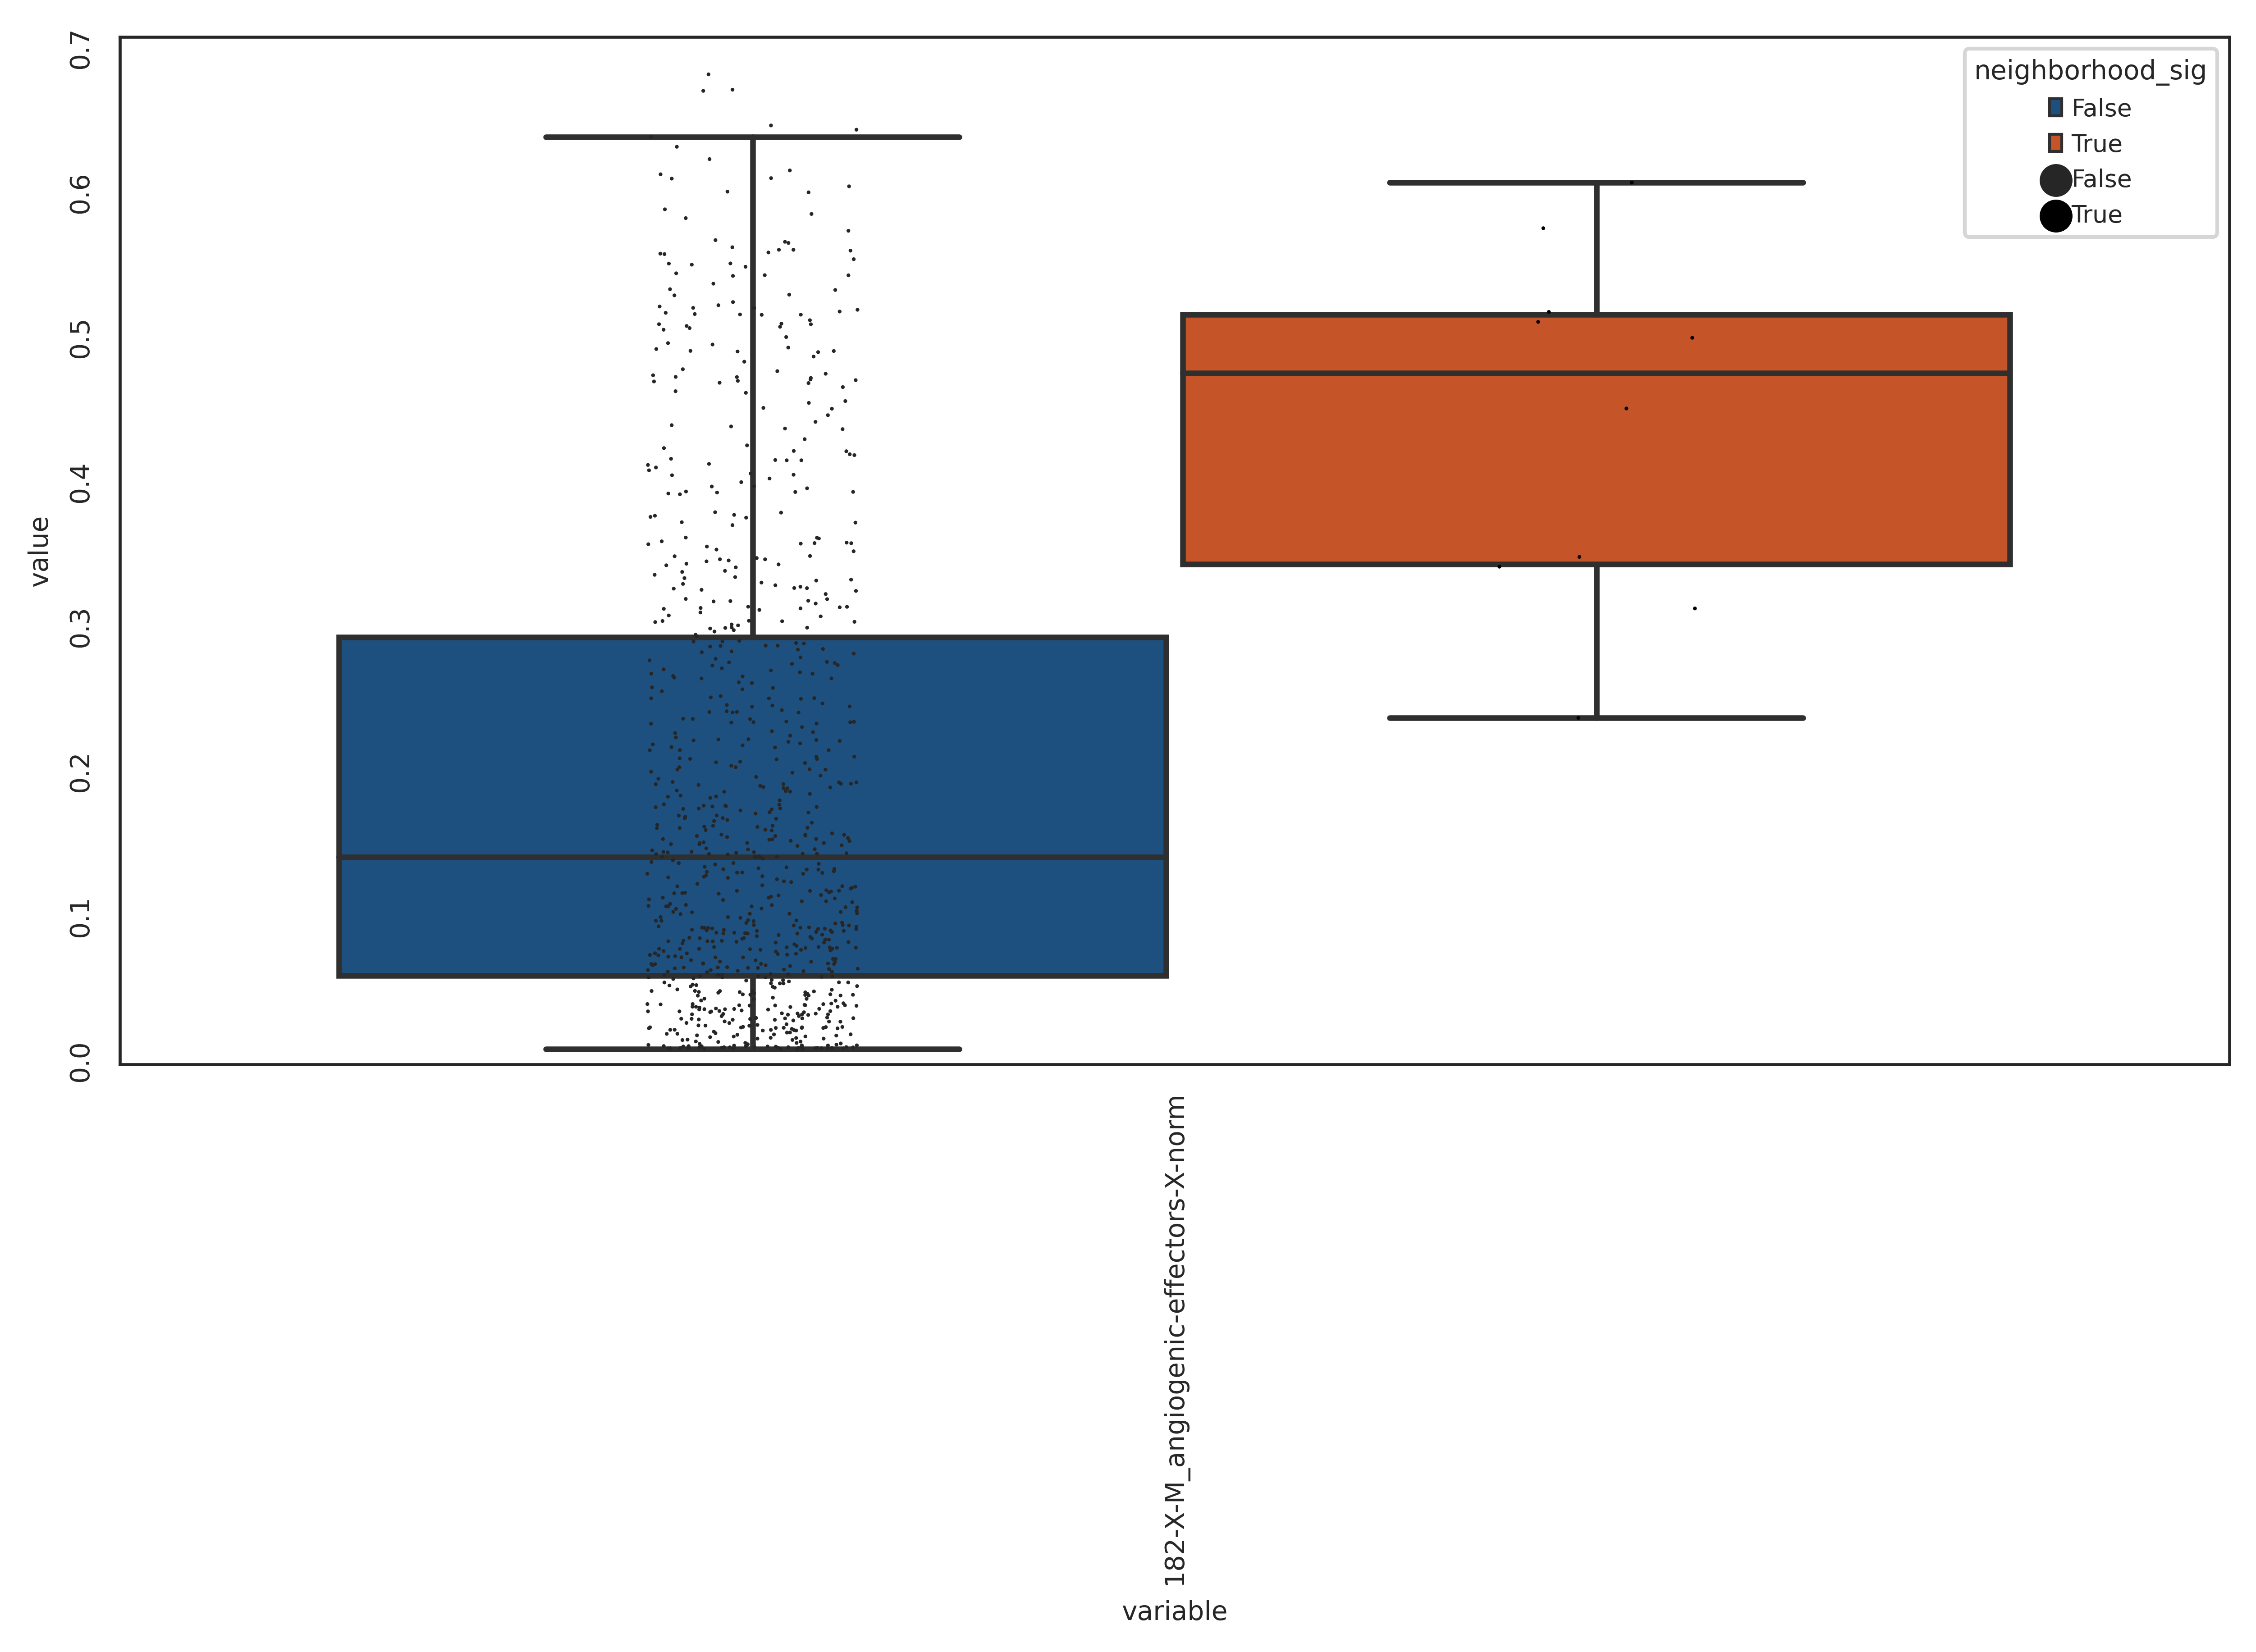

In [35]:
subset_factors = True
factors_of_interest = [
                       '182-X-M_angiogenic-effectors-X-norm',
                       ]
if subset_factors:
    plot_df_sub = plot_df[plot_df['variable'].isin(factors_of_interest)]
else:
    plot_df_sub = plot_df
    
save_name = 'Bassez_TAM_factor_DE_interaction.svg'
sns.set_style('white')
fig,ax = plt.subplots(figsize=(10, 5))
ax.tick_params(labelrotation=90)
ax.set_ylim(-0.01,0.7)
sns.boxplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#D3D2D1',fliersize=0,palette={True:'#DF480F', False:'#0E518F'})#,order=factors_of_interest,
           
sns.stripplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#000000',dodge=True,s=1)#order=factors_of_interest)
plt.axhline(y=1,color='#000000', linestyle='--')
plt.savefig(fig_save_path+save_name)
print('saved to:',fig_save_path+save_name)

In [36]:
#Cohen's d
plot_df_sub_invasion = plot_df_sub[plot_df_sub['variable']=='182-X-M_angiogenic-effectors-X-norm']
df_sub_1 = plot_df_sub_invasion[plot_df_sub_invasion['neighborhood_sig']]
df_sub_2  = plot_df_sub_invasion[~plot_df_sub_invasion['neighborhood_sig']]
(np.mean(df_sub_1['value'])-np.mean(df_sub_2['value']))/np.std(list(df_sub_1['value'])+list(df_sub_2['value']))

1.4938471971522664

In [37]:
x = plot_df_sub[plot_df_sub['neighborhood_sig']==False]
x = list(x[x['variable']=='182-X-M_angiogenic-effectors-X-norm']['value'])
y = plot_df_sub[plot_df_sub['neighborhood_sig']==True]
y = list(y[y['variable']=='182-X-M_angiogenic-effectors-X-norm']['value'])

scipy.stats.mannwhitneyu(x, y, use_continuity=True, 
                         alternative='two-sided',
                         )

MannwhitneyuResult(statistic=1060.0, pvalue=4.9578454987361384e-05)

## dotplot gene expression in ICT-induced and non-induced macrophages in non-responders

In [52]:
#get cells of interest by mapping neighborhoods
sig_cells = []

for i in adata_neigh[adata_neigh.obs['neighborhood_sig']].obs_names:
    sig_cells = sig_cells + neighborhood_cell_dict[i]
    
adata.obs['TAM_NR_sig'] = pd.Categorical(adata.obs_names.isin(sig_cells).astype(str))
adata.obs['TAM_NR_sig'].value_counts()

False    97214
True       649
Name: TAM_NR_sig, dtype: int64

In [53]:
#take subset of macrophage/MDCs
adata_myeloid = adata[adata.obs['annotation_SPADE_1']=='MDC']
adata_myeloid

View of AnnData object with n_obs × n_vars = 12132 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'phen

In [54]:
#zscore data
adata_myeloid.layers['zscored'] = scipy.stats.zscore(np.array(adata_myeloid.X.todense()),axis=0)


In [55]:
#calculate pos frac
thresh=0
group_obs = 'TAM_NR_sig'
A = list(adata_myeloid.uns['SPADE_markers_specific_new']['MDC']['182-X-182'])

#set everything below threshold 0
plotting_df = pd.DataFrame(adata_myeloid[:,A].X.todense(),columns=A,index=adata_myeloid.obs_names)
plotting_df_thresh = plotting_df.applymap(lambda x: 0 if x < thresh else x)
plotting_df_thresh_group = plotting_df_thresh
plotting_df_thresh_group['groups'] = adata_myeloid.obs[group_obs].astype(str)

df = plotting_df_thresh_group.copy()
df_frac = pd.DataFrame()

#calculate positive fraction per gene program and cell type
for i in df.drop(columns='groups').columns:
    df['sign'] = np.sign(df[i])
    allzero  = df['sign'] == 0
    nonezero  = df['sign'] != 0
    if allzero.all() ==False and nonezero.all()==False:
        pos_cells = df.groupby('groups').sign.value_counts()
        pos_frac = pos_cells.unstack()[1].fillna(1)/(pos_cells.unstack()[0].fillna(1)+pos_cells.unstack()[1].fillna(1))
        df_frac[i] = pos_frac
    elif nonezero.all()==True:
        print('for',i,'no negative cells were detected, setting positive fraction to 1')
        df_frac[i] = [1]*(len(df.groupby('groups')))
    elif allzero.all()==True:
        print('for',i,'no positive cells were detected, setting positive fraction to 0')
        df_frac[i] = [0]* (len(df.groupby('groups')))

df_frac

SPP1      MMP9      CTSL      CCL2     APOC1    RNASE1     NUPR1  \
groups                                                                         
False   0.535139  0.282330  0.793608  0.484629  0.663067  0.616302  0.445964   
True    0.845917  0.440678  0.910632  0.412943  0.910632  0.691834  0.516179   

        C15orf48     GPNMB     CXCL8  ...       SCD      GLUL     CCL18  \
groups                                ...                                 
False   0.601062  0.624750  0.382740  ...  0.351215  0.942524  0.172864   
True    0.571649  0.966102  0.503852  ...  0.562404  0.998459  0.300462   

          TYROBP     NR1H3       NPL      CSTB    ANPEP      CTSD    LGALS3  
groups                                                                       
False   0.997126  0.383088  0.546199  0.929026  0.32178  0.908560  0.884612  
True    0.998462  0.647149  0.791988  0.998459  0.51772  0.984592  0.976888  

[2 rows x 50 columns]

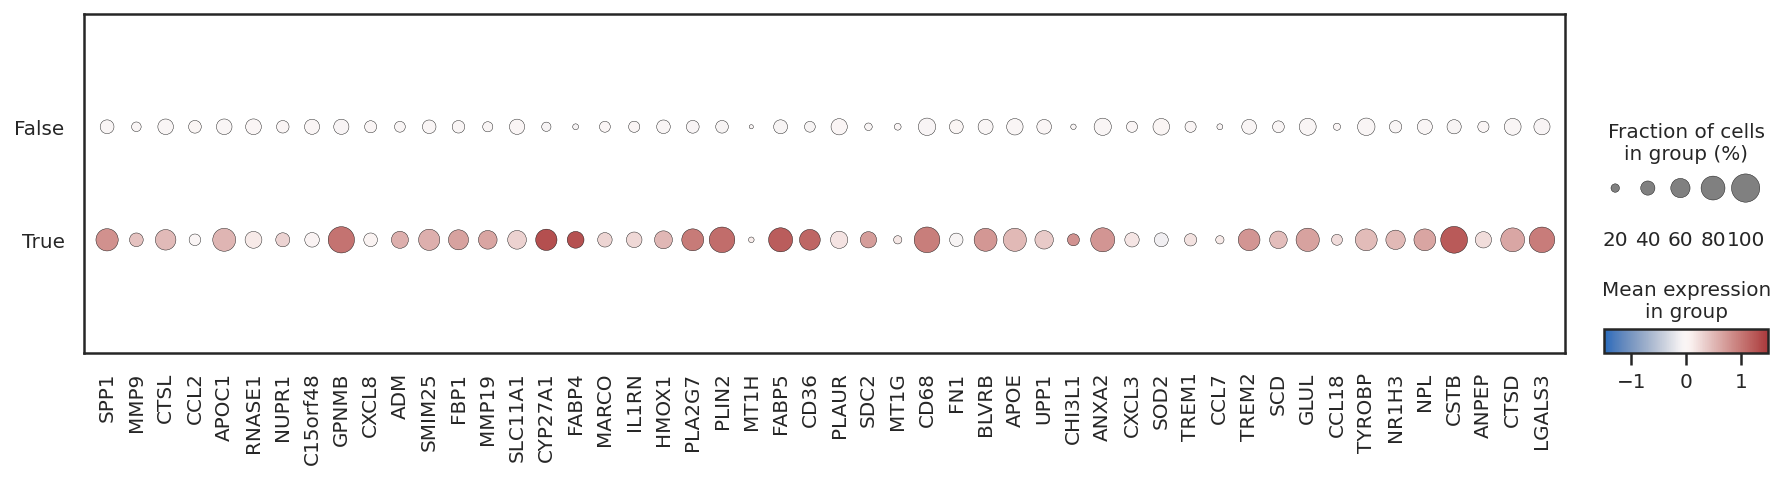

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Dot_plot_Bassez_angio.svg


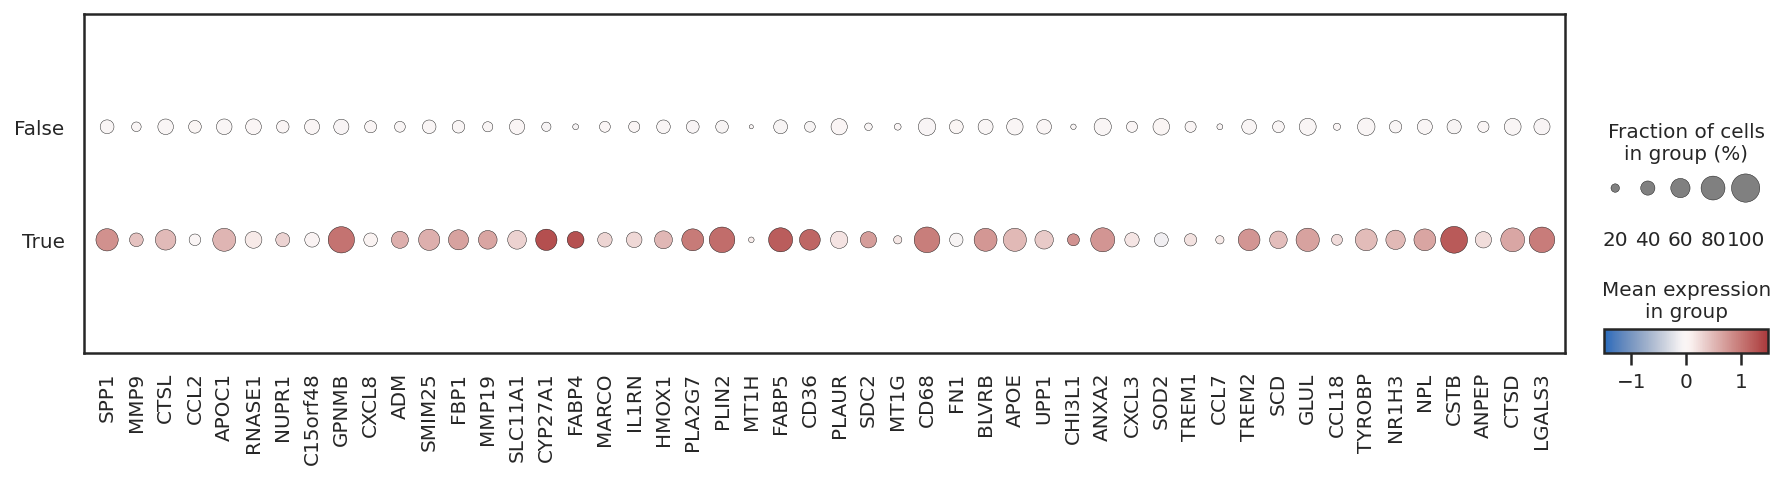

In [56]:
#invasion genes
A = list(adata_myeloid.uns['SPADE_markers_specific_new']['MDC']['182-X-182'])

## dotplot

pheno_heat = 'TAM_NR_sig'
save_name = 'Dot_plot_Bassez_angio.svg'
genes_plot = [x for x in A if x in adata_myeloid.var_names]
%matplotlib inline
sns.set(font_scale = 1)
sns.set_style('white')
dp = sc.pl.dotplot(adata_myeloid,A , groupby=pheno_heat,standard_scale=None, dendrogram=False, return_fig=True,
                 figsize=(15,3),save=save_name, layer='zscored',vmax=1.5,vmin=-1.5)

dp.style(cmap='vlag').show()
dp.savefig(fig_save_path + save_name)
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()
#dp.savefig(save_name)
print('saved Figure to:',fig_save_path + save_name)

In [57]:
#replace dot_sizes calculated on zscored to dot_sizes calculated on scran normalized data
dp.dot_size_df = df_frac[dp.dot_size_df.columns]

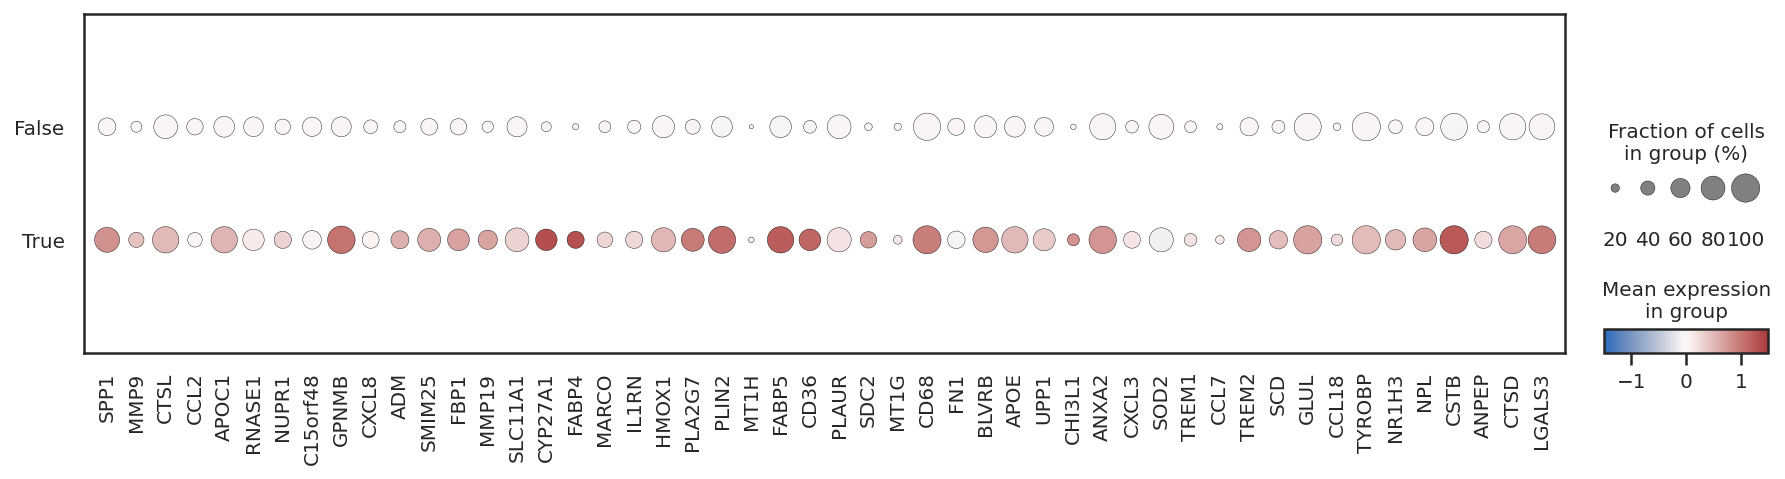

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Dot_plot_Bassez_angio.svg


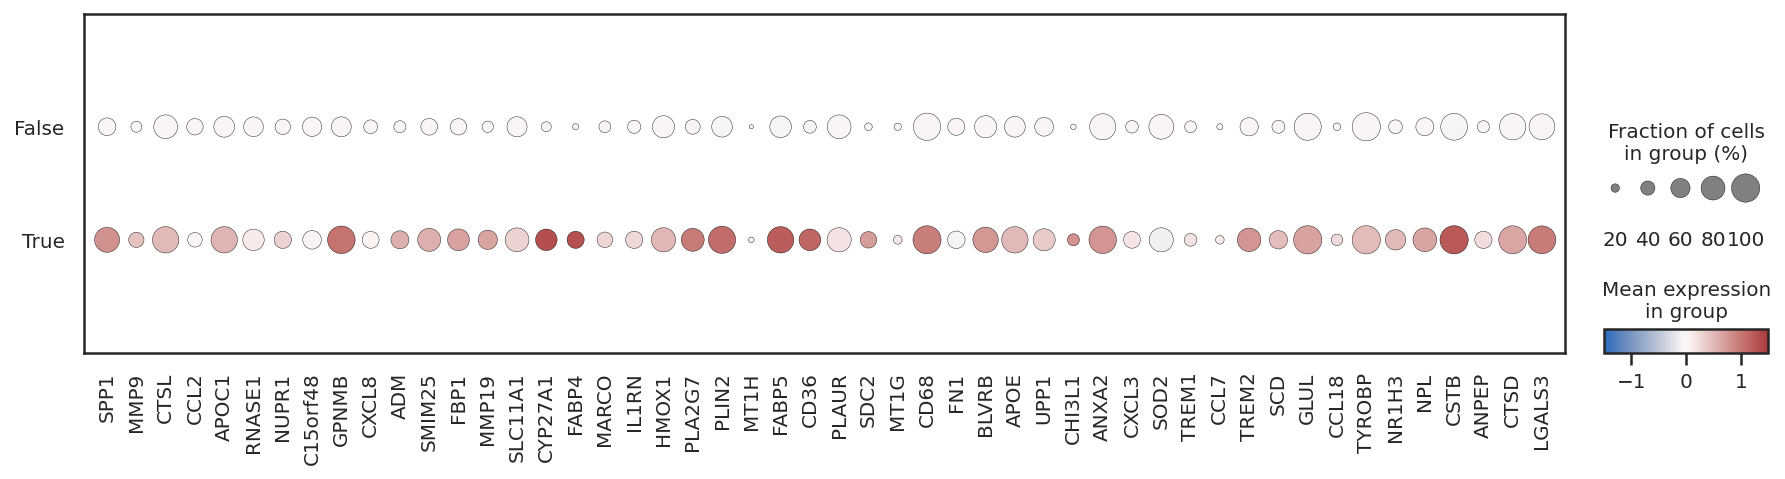

In [58]:
#Bassez genes
dp.style(cmap='vlag').show()
dp.savefig(fig_save_path + save_name)
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()
#dp.savefig(save_name)
print('saved Figure to:',fig_save_path+save_name)

# compare to SLALOM

In [61]:
adata_path_scHPF = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded_scHPF-full.h5ad'
adata_path_SLALOM = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded_SLALOM-full.h5ad'


In [62]:
adata = sc.read(adata_path_SLALOM)
adata

Only considering the two last: ['.0_50PC_reembedded_SLALOM-full', '.h5ad'].
Only considering the two last: ['.0_50PC_reembedded_SLALOM-full', '.h5ad'].


AnnData object with n_obs × n_vars = 97863 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k2

In [63]:
factor_name_list = ['SLALOM_0', 'SLALOM_1', 'SLALOM_2', 'SLALOM_3', 'SLALOM_4', 'SLALOM_5', 'SLALOM_6', 'SLALOM_7', 'SLALOM_8', 'SLALOM_9', 'SLALOM_10', 'SLALOM_11', 'SLALOM_12', 'SLALOM_13', 'SLALOM_14', 'SLALOM_15', 'SLALOM_16', 'SLALOM_17', 'SLALOM_18', 'SLALOM_19']

In [64]:
#read data
adata_neigh_1 = sc.read(adata_neigh_path_1)
adata_neigh_1

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].


AnnData object with n_obs × n_vars = 844 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [65]:
#read data
adata_neigh_2 = sc.read(adata_neigh_path_2)
adata_neigh_2

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].


AnnData object with n_obs × n_vars = 858 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [66]:
#merge fold changes into one adata
adata_neigh_1.obs['logFC_timepoint'] = adata_neigh_2.obs['logFC']
adata_neigh_1.obs['FDR_timepoint'] = adata_neigh_2.obs['FDR']
adata_neigh_1.obs['logFC_interaction'] = adata_neigh_1.obs['logFC']
adata_neigh_1.obs['FDR_interaction'] = adata_neigh_1.obs['FDR']
adata_neigh = adata_neigh_1.copy()

In [67]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
neighborhood_cell_dict = {}
for i in adata_neigh.obs_names:
    sig_neighborhood_path = OUT_RESULT_DIR + 'milo.nhoodDistances_'+ i+ '.csv'
    sig_neighborhood = pd.read_csv(sig_neighborhood_path,index_col=0)
    sig_neighborhood_cell_indices = list(sig_neighborhood.index)
    neighborhood_cell_dict_neighborhood = list(sig_neighborhood_cell_indices)
    neighborhood_cell_dict[i]=neighborhood_cell_dict_neighborhood

In [68]:
adata_neigh

AnnData object with n_obs × n_vars = 844 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'FDR_timepoint', 'logFC_interaction', 'FDR_interaction'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [69]:
#calculate mean factor expression per neighborhood

#remove non factor columns from adata
non_factor_columns = ['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'logFC_interaction', 'FDR_timepoint', 'FDR_interaction'] 
adata_neigh_nonfactor_columns = adata_neigh.obs[non_factor_columns] 
adata_neigh.obs = adata_neigh.obs.drop(columns=non_factor_columns) 

#add factor columns 

adata_neigh.obs = pd.DataFrame(index=adata_neigh.obs_names, columns=factor_name_list)

#average factor cell scores per neighborhood

for i in adata_neigh.obs_names:
    adata_sub_df = adata[adata.obs_names.isin(neighborhood_cell_dict[i])].obs
    adata_neigh.obs.loc[i,:]  = list(np.mean(adata_sub_df[factor_name_list],axis=0))

# add non factor columns back to adata
for i in non_factor_columns:
    adata_neigh.obs[i] = adata_neigh_nonfactor_columns[i]

In [70]:
#identify population of interest timepoint
FDR_timepoint_thresh = 0.05
logfold_thresh = 0
greater_than = True

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_timepoint']<FDR_timepoint_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']<=logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_timepoint'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_timepoint'].value_counts()

False    762
True      82
Name: neighborhood_sig_timepoint, dtype: int64

In [71]:
#identify population of interest interaction
FDR_interaction_thresh = 0.05
logfold_thresh = 0
greater_than = False

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_interaction']<FDR_interaction_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']<=logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_interaction'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_interaction'].value_counts()

False    823
True      21
Name: neighborhood_sig_interaction, dtype: int64

In [72]:
#take intersection of timepoint and interaction
adata_neigh.obs['neighborhood_sig'] = adata_neigh.obs['neighborhood_sig_timepoint'] * adata_neigh.obs['neighborhood_sig_interaction']
adata_neigh.obs['neighborhood_sig'].value_counts()

False    834
True      10
Name: neighborhood_sig, dtype: int64

In [73]:
plot_df = pd.melt(adata_neigh.obs.drop(columns=['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 
                                                'logFC_interaction', 'FDR_timepoint', 'FDR_interaction',
                                               'neighborhood_sig_timepoint','neighborhood_sig_interaction']),id_vars=['neighborhood_sig'])

saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_TAM_factor_DE_interaction_SLALOM.svg


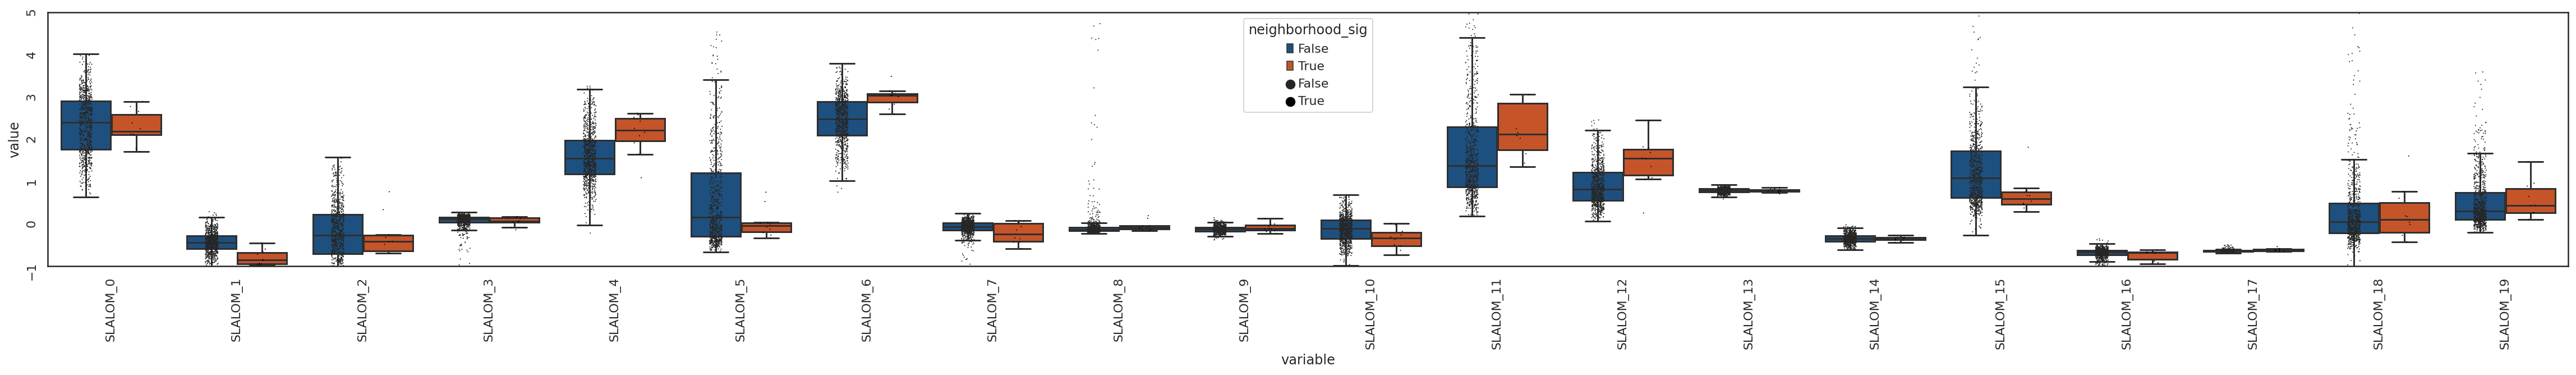

In [74]:
subset_factors = False

if subset_factors:
    plot_df_sub = plot_df[plot_df['variable'].isin(factors_of_interest)]
else:
    plot_df_sub = plot_df
    
save_name = 'Bassez_TAM_factor_DE_interaction_SLALOM.svg'
sns.set_style('white')
fig,ax = plt.subplots(figsize=(40, 4))
ax.tick_params(labelrotation=90)
ax.set_ylim(-1,5)
sns.boxplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#D3D2D1',fliersize=0,palette={True:'#DF480F', False:'#0E518F'})#,order=factors_of_interest,
           
sns.stripplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#000000',dodge=True,s=1)#order=factors_of_interest)
#plt.axhline(y=1,color='#000000', linestyle='--')
plt.savefig(fig_save_path+save_name)
print('saved to:',fig_save_path+save_name)

In [75]:
#get neighborhoods of interest
sig_neighborhoods = set(plot_df[plot_df['neighborhood_sig']].index)
sig_neighborhoods

{208,
 299,
 332,
 504,
 548,
 581,
 658,
 673,
 809,
 828,
 1052,
 1143,
 1176,
 1348,
 1392,
 1425,
 1502,
 1517,
 1653,
 1672,
 1896,
 1987,
 2020,
 2192,
 2236,
 2269,
 2346,
 2361,
 2497,
 2516,
 2740,
 2831,
 2864,
 3036,
 3080,
 3113,
 3190,
 3205,
 3341,
 3360,
 3584,
 3675,
 3708,
 3880,
 3924,
 3957,
 4034,
 4049,
 4185,
 4204,
 4428,
 4519,
 4552,
 4724,
 4768,
 4801,
 4878,
 4893,
 5029,
 5048,
 5272,
 5363,
 5396,
 5568,
 5612,
 5645,
 5722,
 5737,
 5873,
 5892,
 6116,
 6207,
 6240,
 6412,
 6456,
 6489,
 6566,
 6581,
 6717,
 6736,
 6960,
 7051,
 7084,
 7256,
 7300,
 7333,
 7410,
 7425,
 7561,
 7580,
 7804,
 7895,
 7928,
 8100,
 8144,
 8177,
 8254,
 8269,
 8405,
 8424,
 8648,
 8739,
 8772,
 8944,
 8988,
 9021,
 9098,
 9113,
 9249,
 9268,
 9492,
 9583,
 9616,
 9788,
 9832,
 9865,
 9942,
 9957,
 10093,
 10112,
 10336,
 10427,
 10460,
 10632,
 10676,
 10709,
 10786,
 10801,
 10937,
 10956,
 11180,
 11271,
 11304,
 11476,
 11520,
 11553,
 11630,
 11645,
 11781,
 11800,
 12024,


In [76]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
set(plot_df['neighborhood_sig'].index).intersection(set([str(x) for x in list(neighborhood_cell_dict.keys())]))

set()

In [77]:
#get cells of interest by mapping neighborhoods
sig_cells = []

for i in adata_neigh[adata_neigh.obs['neighborhood_sig']].obs_names:
    sig_cells = sig_cells + neighborhood_cell_dict[i]
    
adata.obs['TAM_NR_sig'] = pd.Categorical(adata.obs_names.isin(sig_cells).astype(str))
adata.obs['TAM_NR_sig'].value_counts()

False    97214
True       649
Name: TAM_NR_sig, dtype: int64

In [78]:
adata_myeloid = adata[adata.obs['annotation_SPADE_1']=='MDC']
adata_myeloid

View of AnnData object with n_obs × n_vars = 12132 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'phen

In [79]:
#calculate overlap coefficients for each factor vs every input gene set

overlap_df_SLALOM = pd.DataFrame()

for i in factor_name_list:
    for j in set(input_df['gs.name']):
        set_a = set(input_df[input_df['gs.name']==j]['g.name'])
        set_b = set(adata.uns['SLALOM_markers_global'][i])
        min_len = min([len(set_a),len(set_b)])
        intersect = set_a.intersection(set_b)
        overlap_coeff = len(intersect)/min_len
        overlap_df_SLALOM.loc[i,j] = overlap_coeff
overlap_df_SLALOM

/home/wallet/.local/lib/python3.10/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


all_TLR_signaling  all_fatty-acid-beta-oxidation-peroxisomal  \
SLALOM_0                0.06                                        0.0   
SLALOM_1                0.02                                        0.0   
SLALOM_2                0.02                                        0.0   
SLALOM_3                0.02                                        0.0   
SLALOM_4                0.00                                        0.0   
SLALOM_5                0.04                                        0.0   
SLALOM_6                0.04                                        0.0   
SLALOM_7                0.02                                        0.0   
SLALOM_8                0.00                                        0.0   
SLALOM_9                0.00                                        0.0   
SLALOM_10               0.02                                        0.0   
SLALOM_11               0.04                                        0.0   
SLALOM_12               0.02                                        0.0   
SLALOM_13               0.02                                        0.0   
SLALOM_14               0.02                                        0.0   
SLALOM_15               0.06                                        0.0   
SLALOM_16               0.02                                        0.0   
SLALOM_17               0.02                                        0.0   
SLALOM_18               0.04                                        0.0   
SLALOM_19               0.02                                        0.0   

           all_transmembrane-transport-lysosome  Mac_CSF1_response  \
SLALOM_0                                  0.000                0.0   
SLALOM_1                                  0.000                0.0   
SLALOM_2                                  0.000                0.0   
SLALOM_3                                  0.000                0.0   
SLALOM_4                                  0.125                0.0   
SLALOM_5                                  0.000                0.0   
SLALOM_6                                  0.000                0.0   
SLALOM_7                                  0.000                0.0   
SLALOM_8                                  0.000                0.0   
SLALOM_9                                  0.000                0.0   
SLALOM_10                                 0.000                0.0   
SLALOM_11                                 0.000                0.0   
SLALOM_12                                 0.000                0.0   
SLALOM_13                                 0.000                0.0   
SLALOM_14                                 0.000                0.0   
SLALOM_15                                 0.000                0.0   
SLALOM_16                                 0.000                0.0   
SLALOM_17                                 0.000                0.0   
SLALOM_18                                 0.000                0.0   
SLALOM_19                                 0.000                0.0   

           all_exocytosis  all_MHC-II-presentation  leuko_ROS_production  \
SLALOM_0             0.00                 0.243902                   0.0   
SLALOM_1             0.02                 0.000000                   0.0   
SLALOM_2             0.02                 0.000000                   0.0   
SLALOM_3             0.02                 0.000000                   0.0   
SLALOM_4             0.02                 0.024390                   0.1   
SLALOM_5             0.00                 0.000000                   0.0   
SLALOM_6             0.00                 0.024390                   0.1   
SLALOM_7             0.02                 0.000000                   0.0   
SLALOM_8             0.00                 0.000000                   0.0   
SLALOM_9             0.00                 0.000000                   0.0   
SLALOM_10            0.02                 0.390244                   0.0   
SLALOM_11            0.00                 0.024390  

In [80]:
#add invasion factor SPECTRA 182
invasion_factor = ['SPP1',
 'MMP9',
 'CTSL',
 'CCL2',
 'APOC1',
 'RNASE1',
 'NUPR1',
 'C15orf48',
 'GPNMB',
 'CXCL8',
 'ADM',
 'SMIM25',
 'FBP1',
 'MMP19',
 'SLC11A1',
 'CYP27A1',
 'FABP4',
 'MARCO',
 'IL1RN',
 'HMOX1',
 'PLA2G7',
 'PLIN2',
 'MT1H',
 'FABP5',
 'CD36',
 'PLAUR',
 'SDC2',
 'MT1G',
 'CD68',
 'FN1',
 'BLVRB',
 'APOE',
 'UPP1',
 'CHI3L1',
 'ANXA2',
 'CXCL3',
 'SOD2',
 'TREM1',
 'CCL7',
 'TREM2',
 'SCD',
 'GLUL',
 'CCL18',
 'TYROBP',
 'NR1H3',
 'NPL',
 'CSTB',
 'ANPEP',
 'CTSD',
 'LGALS3']

overlap_list = []

for i in factor_name_list:
    set_a = set(invasion_factor)
    set_b = set(adata.uns['SLALOM_markers_global'][i])
    min_len = min([len(set_a),len(set_b)])
    intersect = set_a.intersection(set_b)
    overlap_coeff = len(intersect)/min_len
    overlap_list.append(overlap_coeff)

overlap_df_SLALOM['invasion'] = overlap_list

In [81]:
overlap_df_SLALOM.loc[:,'invasion'].sort_values(ascending=False)

SLALOM_6     0.32
SLALOM_11    0.12
SLALOM_0     0.06
SLALOM_18    0.06
SLALOM_4     0.02
SLALOM_16    0.02
SLALOM_17    0.00
SLALOM_15    0.00
SLALOM_14    0.00
SLALOM_13    0.00
SLALOM_12    0.00
SLALOM_10    0.00
SLALOM_1     0.00
SLALOM_9     0.00
SLALOM_8     0.00
SLALOM_7     0.00
SLALOM_5     0.00
SLALOM_3     0.00
SLALOM_2     0.00
SLALOM_19    0.00
Name: invasion, dtype: float64

In [82]:
overlap_df_SLALOM.loc['SLALOM_15'].sort_values(ascending=False)

T_tcr-activation                  0.720000
B_effector-2_UP                   0.500000
B_Breg_UP                         0.400000
CD4-T_TH1_UP                      0.285714
all_TNF-via-NFkB_signaling        0.280000
                                    ...   
all_phosphoinositide_signaling    0.000000
all_autophagy-of-mitochondria     0.000000
all_fatty-acid_synthesis          0.000000
all_mitophagy                     0.000000
invasion                          0.000000
Name: SLALOM_15, Length: 183, dtype: float64

In [83]:
factors_of_interest = ['SLALOM_'+ str(x)for x in range(20)]

overlap_df_SLALOM = overlap_df_SLALOM.loc[factors_of_interest,:]
overlap_df_SLALOM

all_TLR_signaling  all_fatty-acid-beta-oxidation-peroxisomal  \
SLALOM_0                0.06                                        0.0   
SLALOM_1                0.02                                        0.0   
SLALOM_2                0.02                                        0.0   
SLALOM_3                0.02                                        0.0   
SLALOM_4                0.00                                        0.0   
SLALOM_5                0.04                                        0.0   
SLALOM_6                0.04                                        0.0   
SLALOM_7                0.02                                        0.0   
SLALOM_8                0.00                                        0.0   
SLALOM_9                0.00                                        0.0   
SLALOM_10               0.02                                        0.0   
SLALOM_11               0.04                                        0.0   
SLALOM_12               0.02                                        0.0   
SLALOM_13               0.02                                        0.0   
SLALOM_14               0.02                                        0.0   
SLALOM_15               0.06                                        0.0   
SLALOM_16               0.02                                        0.0   
SLALOM_17               0.02                                        0.0   
SLALOM_18               0.04                                        0.0   
SLALOM_19               0.02                                        0.0   

           all_transmembrane-transport-lysosome  Mac_CSF1_response  \
SLALOM_0                                  0.000                0.0   
SLALOM_1                                  0.000                0.0   
SLALOM_2                                  0.000                0.0   
SLALOM_3                                  0.000                0.0   
SLALOM_4                                  0.125                0.0   
SLALOM_5                                  0.000                0.0   
SLALOM_6                                  0.000                0.0   
SLALOM_7                                  0.000                0.0   
SLALOM_8                                  0.000                0.0   
SLALOM_9                                  0.000                0.0   
SLALOM_10                                 0.000                0.0   
SLALOM_11                                 0.000                0.0   
SLALOM_12                                 0.000                0.0   
SLALOM_13                                 0.000                0.0   
SLALOM_14                                 0.000                0.0   
SLALOM_15                                 0.000                0.0   
SLALOM_16                                 0.000                0.0   
SLALOM_17                                 0.000                0.0   
SLALOM_18                                 0.000                0.0   
SLALOM_19                                 0.000                0.0   

           all_exocytosis  all_MHC-II-presentation  leuko_ROS_production  \
SLALOM_0             0.00                 0.243902                   0.0   
SLALOM_1             0.02                 0.000000                   0.0   
SLALOM_2             0.02                 0.000000                   0.0   
SLALOM_3             0.02                 0.000000                   0.0   
SLALOM_4             0.02                 0.024390                   0.1   
SLALOM_5             0.00                 0.000000                   0.0   
SLALOM_6             0.00                 0.024390                   0.1   
SLALOM_7             0.02                 0.000000                   0.0   
SLALOM_8             0.00                 0.000000                   0.0   
SLALOM_9             0.00                 0.000000                   0.0   
SLALOM_10            0.02                 0.390244                   0.0   
SLALOM_11            0.00                 0.024390  

SLALOM_overlap_map.svg


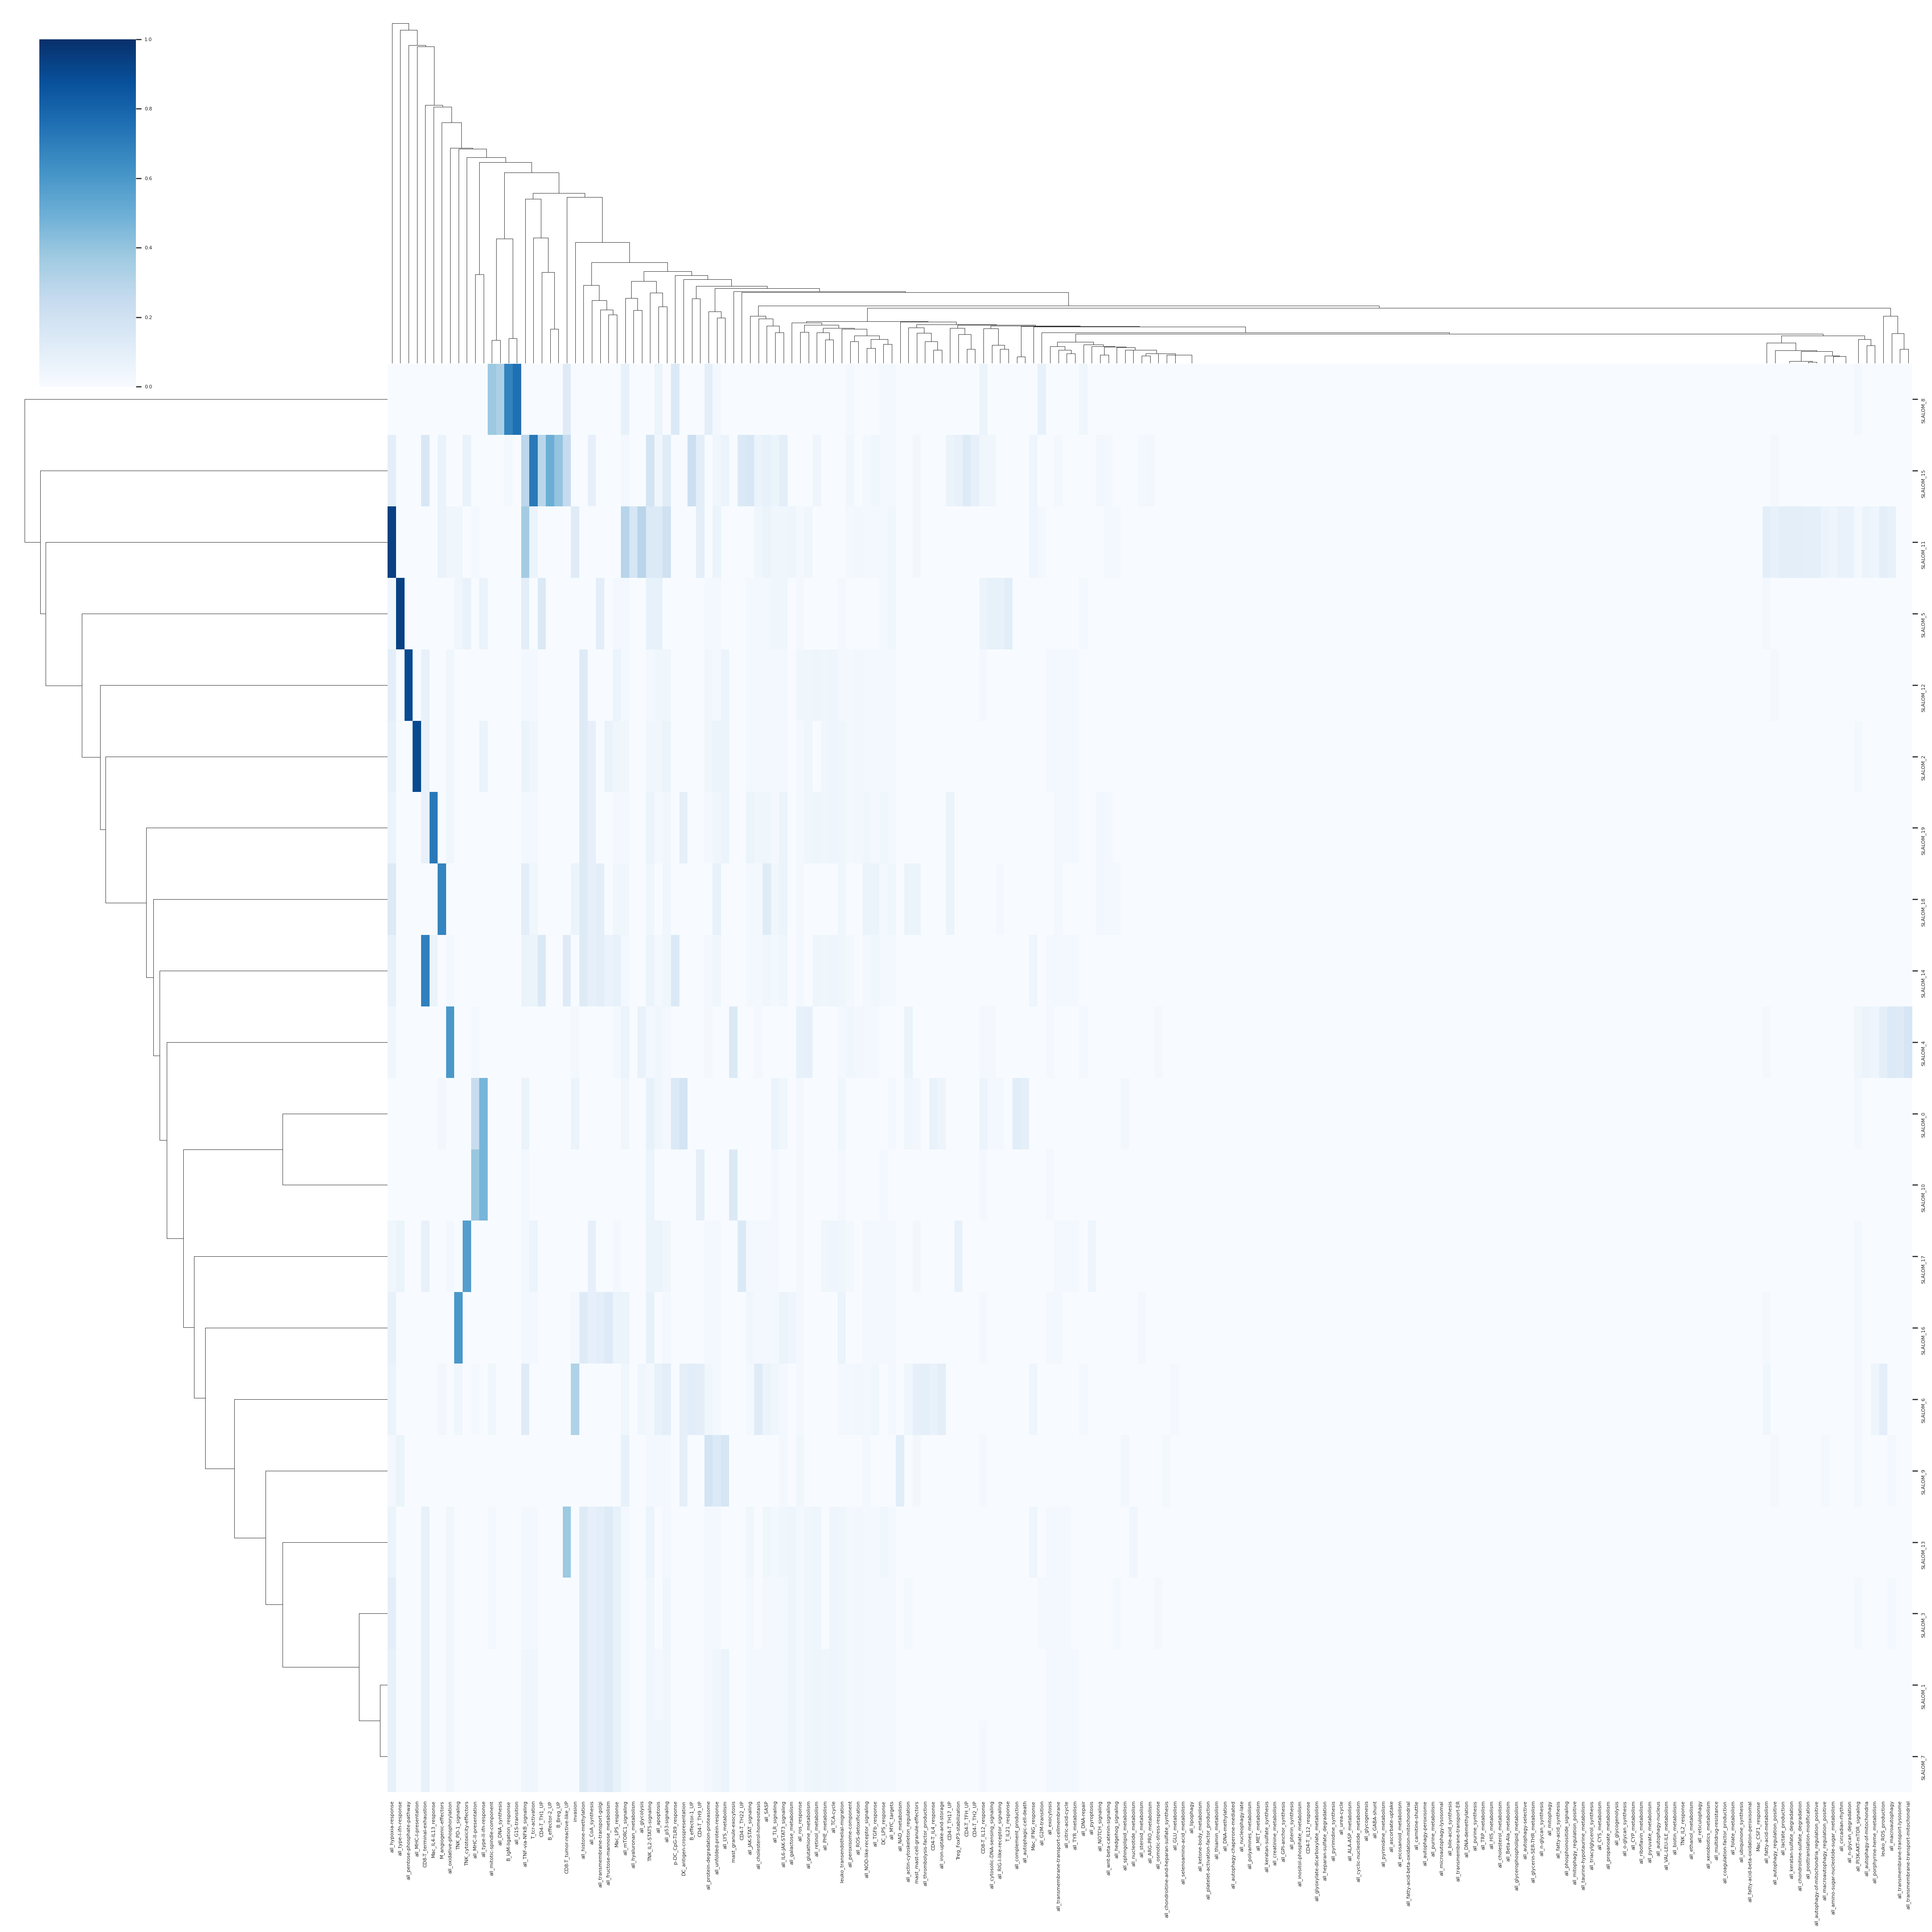

In [84]:
#plot max overlap
save_name = 'SLALOM_overlap_map.svg'
sns.set(font_scale=0.5)
sns.clustermap(overlap_df_SLALOM,pivot_kws=None, method='average', metric='euclidean', 
           standard_scale=None, figsize=(30, 30), cbar_kws=None, row_cluster=True, 
           col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, 
           col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cmap='Blues',
           cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None,vmin=0,center=0.5,vmax=1)
plt.savefig(fig_save_path + save_name)
print(save_name)

### plot fold change in NR macrophages vs other macrophages and overlap with invasion factor marker genes

In [89]:
groupby= 'neighborhood_sig'
data_plot = adata_neigh.obs[factor_name_list+[groupby]]
data_plot_mean = pd.DataFrame([np.mean(data_plot[data_plot[groupby]==True]).drop(groupby),
                               np.mean(data_plot[data_plot[groupby]==False]).drop(groupby)])


In [90]:
#CREATE DF
fold_change = data_plot_mean.loc[0]/data_plot_mean.loc[1]
plot_df = pd.DataFrame([overlap_df_SLALOM['invasion'],fold_change],index=['invasion','fold_change']).T
plot_df

invasion  fold_change
SLALOM_0       0.06     0.973089
SLALOM_1       0.00     1.824487
SLALOM_2       0.00     1.780085
SLALOM_3       0.00     1.646642
SLALOM_4       0.02     1.323530
SLALOM_5       0.00     0.057486
SLALOM_6       0.32     1.215725
SLALOM_7       0.00     2.435495
SLALOM_8       0.00     0.979260
SLALOM_9       0.00     0.702834
SLALOM_10      0.00     2.876371
SLALOM_11      0.12     1.544173
SLALOM_12      0.00     1.594865
SLALOM_13      0.00     0.991077
SLALOM_14      0.00     1.001373
SLALOM_15      0.00     0.555612
SLALOM_16      0.02     1.082334
SLALOM_17      0.00     0.957702
SLALOM_18      0.06     0.619735
SLALOM_19      0.00     1.089994

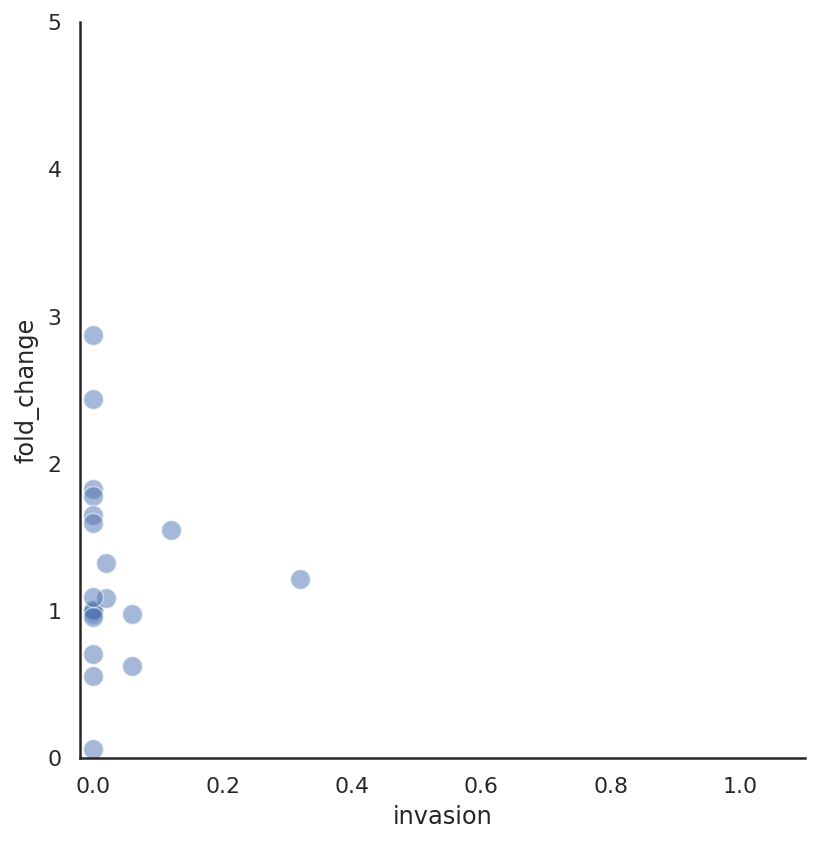

In [91]:
import seaborn as sns
sns.set_theme(style="white")
save_name = 'Bassez_SLALOM_invasion_overlap_foldchange.svg'

sns.relplot(x="invasion", y="fold_change",  s=100,
            alpha=0.5,palette=['#000000'],
            height=6, data=plot_df)
plt.xlim(-0.02,1.1)
plt.ylim(0,5)
plt.savefig(fig_save_path + save_name)

# scHPF comparison

In [92]:
adata_path_scHPF = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/BRCA-X-TIL-X-Bassez_2021-X-cohort1_2_annotated_211208_cell-type-spec_global0.01_delta_0.001_beta_0.0_pseudo_0.0_50PC_reembedded_scHPF-full.h5ad'


In [93]:
adata = sc.read(adata_path_scHPF)
adata

Only considering the two last: ['.0_50PC_reembedded_scHPF-full', '.h5ad'].
Only considering the two last: ['.0_50PC_reembedded_scHPF-full', '.h5ad'].


AnnData object with n_obs × n_vars = 97863 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k2

In [94]:
factor_name_list = ['scHPF_0', 'scHPF_1', 'scHPF_2', 'scHPF_3', 'scHPF_4', 'scHPF_5', 'scHPF_6', 'scHPF_7', 'scHPF_8', 'scHPF_9', 'scHPF_10', 'scHPF_11', 'scHPF_12', 'scHPF_13', 'scHPF_14', 'scHPF_15', 'scHPF_16', 'scHPF_17', 'scHPF_18', 'scHPF_19', 'scHPF_20', 'scHPF_21', 'scHPF_22', 'scHPF_23', 'scHPF_24', 'scHPF_25', 'scHPF_26', 'scHPF_27', 'scHPF_28', 'scHPF_29', 'scHPF_30', 'scHPF_31', 'scHPF_32', 'scHPF_33', 'scHPF_34', 'scHPF_35', 'scHPF_36', 'scHPF_37', 'scHPF_38', 'scHPF_39', 'scHPF_40', 'scHPF_41', 'scHPF_42', 'scHPF_43', 'scHPF_44', 'scHPF_45', 'scHPF_46', 'scHPF_47', 'scHPF_48', 'scHPF_49', 'scHPF_50', 'scHPF_51', 'scHPF_52', 'scHPF_53', 'scHPF_54', 'scHPF_55', 'scHPF_56', 'scHPF_57', 'scHPF_58', 'scHPF_59', 'scHPF_60', 'scHPF_61', 'scHPF_62', 'scHPF_63', 'scHPF_64', 'scHPF_65', 'scHPF_66', 'scHPF_67', 'scHPF_68', 'scHPF_69', 'scHPF_70', 'scHPF_71', 'scHPF_72', 'scHPF_73', 'scHPF_74', 'scHPF_75', 'scHPF_76', 'scHPF_77', 'scHPF_78', 'scHPF_79', 'scHPF_80', 'scHPF_81', 'scHPF_82', 'scHPF_83', 'scHPF_84', 'scHPF_85', 'scHPF_86', 'scHPF_87', 'scHPF_88', 'scHPF_89', 'scHPF_90', 'scHPF_91', 'scHPF_92', 'scHPF_93', 'scHPF_94', 'scHPF_95', 'scHPF_96', 'scHPF_97', 'scHPF_98', 'scHPF_99']

In [95]:
#read data
adata_neigh_1 = sc.read(adata_neigh_path_1)
adata_neigh_1

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold', '.h5ad'].


AnnData object with n_obs × n_vars = 844 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [96]:
#read data
adata_neigh_2 = sc.read(adata_neigh_path_2)
adata_neigh_2

Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].
Only considering the two last: ['.0_50PC_M_reembedded_neigh_prevson_NEE_interaction_NRfold_2', '.h5ad'].


AnnData object with n_obs × n_vars = 858 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [97]:
#merge fold changes into one adata
adata_neigh_1.obs['logFC_timepoint'] = adata_neigh_2.obs['logFC']
adata_neigh_1.obs['FDR_timepoint'] = adata_neigh_2.obs['FDR']
adata_neigh_1.obs['logFC_interaction'] = adata_neigh_1.obs['logFC']
adata_neigh_1.obs['FDR_interaction'] = adata_neigh_1.obs['FDR']
adata_neigh = adata_neigh_1.copy()

In [98]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
neighborhood_cell_dict = {}
for i in adata_neigh.obs_names:
    sig_neighborhood_path = OUT_RESULT_DIR + 'milo.nhoodDistances_'+ i+ '.csv'
    sig_neighborhood = pd.read_csv(sig_neighborhood_path,index_col=0)
    sig_neighborhood_cell_indices = list(sig_neighborhood.index)
    neighborhood_cell_dict_neighborhood = list(sig_neighborhood_cell_indices)
    neighborhood_cell_dict[i]=neighborhood_cell_dict_neighborhood

In [99]:
adata_neigh

AnnData object with n_obs × n_vars = 844 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'FDR_timepoint', 'logFC_interaction', 'FDR_interaction'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [100]:
#calculate mean factor expression per neighborhood

#remove non factor columns from adata
non_factor_columns = ['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 'logFC_interaction', 'FDR_timepoint', 'FDR_interaction'] 
adata_neigh_nonfactor_columns = adata_neigh.obs[non_factor_columns] 
adata_neigh.obs = adata_neigh.obs.drop(columns=non_factor_columns) 

#add factor columns 

adata_neigh.obs = pd.DataFrame(index=adata_neigh.obs_names, columns=factor_name_list)

#average factor cell scores per neighborhood

for i in adata_neigh.obs_names:
    adata_sub_df = adata[adata.obs_names.isin(neighborhood_cell_dict[i])].obs
    adata_neigh.obs.loc[i,:]  = list(np.mean(adata_sub_df[factor_name_list],axis=0))

# add non factor columns back to adata
for i in non_factor_columns:
    adata_neigh.obs[i] = adata_neigh_nonfactor_columns[i]

In [101]:
#identify population of interest timepoint
FDR_timepoint_thresh = 0.05
logfold_thresh = 0
greater_than = True

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_timepoint']<FDR_timepoint_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_timepoint']<=logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_timepoint'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_timepoint'].value_counts()

False    762
True      82
Name: neighborhood_sig_timepoint, dtype: int64

In [102]:
#identify population of interest interaction
FDR_interaction_thresh = 0.05
logfold_thresh = 0
greater_than = False

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR_interaction']<FDR_interaction_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC_interaction']<=logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig_interaction'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig_interaction'].value_counts()

False    823
True      21
Name: neighborhood_sig_interaction, dtype: int64

In [103]:
#take intersection of timepoint and interaction
adata_neigh.obs['neighborhood_sig'] = adata_neigh.obs['neighborhood_sig_timepoint'] * adata_neigh.obs['neighborhood_sig_interaction']
adata_neigh.obs['neighborhood_sig'].value_counts()

False    834
True      10
Name: neighborhood_sig, dtype: int64

In [104]:
plot_df = pd.melt(adata_neigh.obs.drop(columns=['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR', 'logFC_timepoint', 
                                                'logFC_interaction', 'FDR_timepoint', 'FDR_interaction',
                                               'neighborhood_sig_timepoint','neighborhood_sig_interaction']),id_vars=['neighborhood_sig'])

saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Bassez_TAM_factor_DE_interaction_scHPF.svg


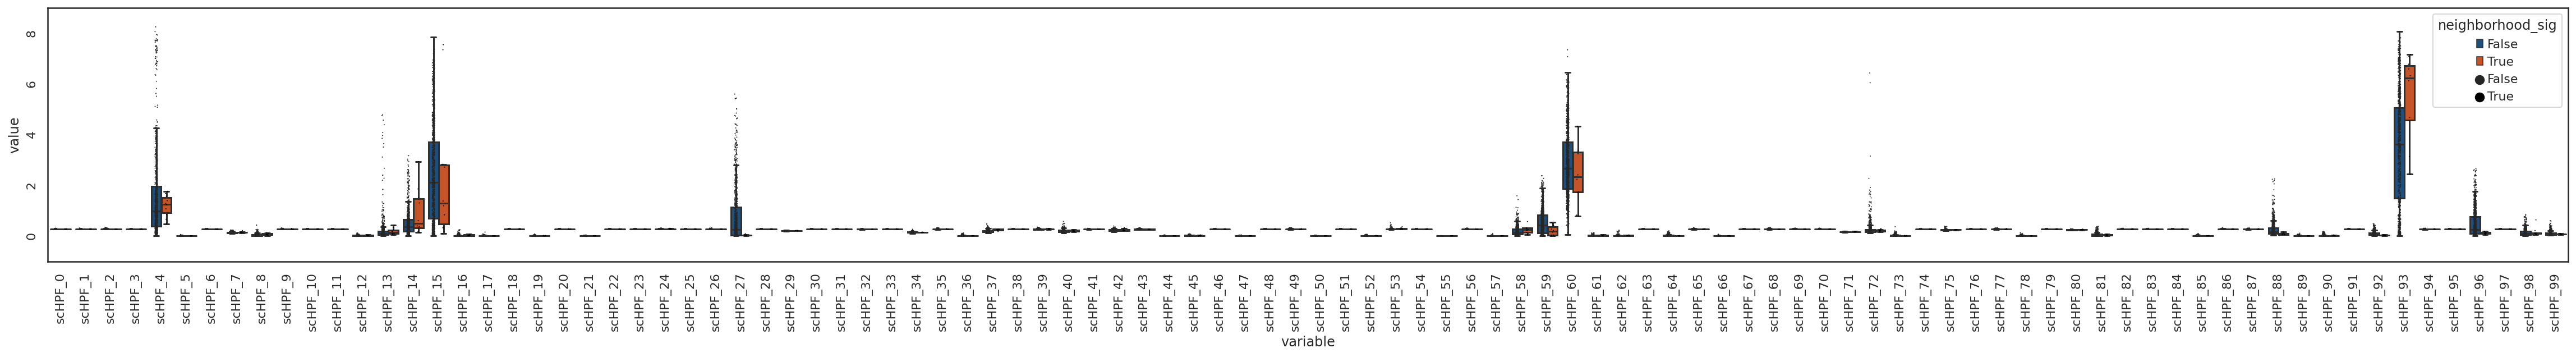

In [105]:
subset_factors = False

if subset_factors:
    plot_df_sub = plot_df[plot_df['variable'].isin(factors_of_interest)]
else:
    plot_df_sub = plot_df
    
save_name = 'Bassez_TAM_factor_DE_interaction_scHPF.svg'
sns.set_style('white')
fig,ax = plt.subplots(figsize=(40, 4))
ax.tick_params(labelrotation=90)
ax.set_ylim(-1,9)
sns.boxplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#D3D2D1',fliersize=0,palette={True:'#DF480F', False:'#0E518F'})#,order=factors_of_interest,
           
sns.stripplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#000000',dodge=True,s=1)#order=factors_of_interest)
#plt.axhline(y=1,color='#000000', linestyle='--')
plt.savefig(fig_save_path+save_name)
print('saved to:',fig_save_path+save_name)

scHPF_TAM_factor_DE_clustermap.svg


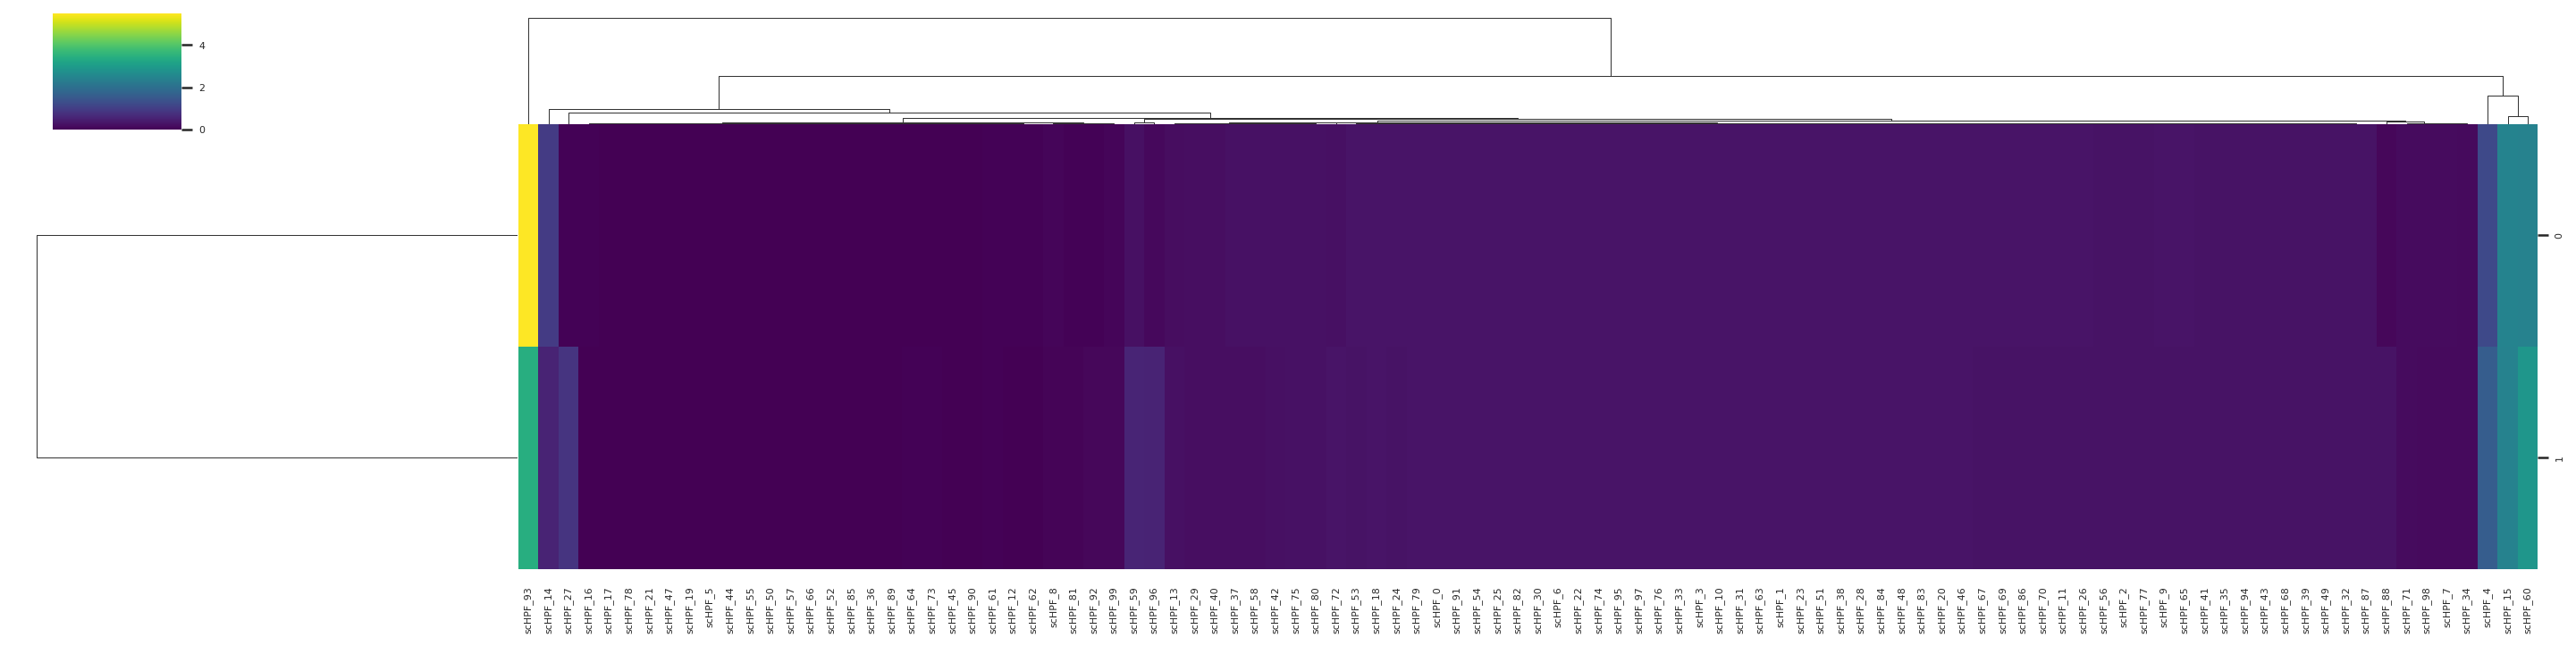

In [106]:
factors_plot = ['scHPF_'+str(i) for i in range(100)]
groupby= 'neighborhood_sig'
data_plot = adata_neigh.obs[factors_plot+[groupby]]
data_plot_mean = pd.DataFrame([np.mean(data_plot[data_plot[groupby]==True]).drop(groupby),
                               np.mean(data_plot[data_plot[groupby]==False]).drop(groupby)])

save_name = 'scHPF_TAM_factor_DE_clustermap.svg'
sns.set(font_scale=0.5)
sns.clustermap(data_plot_mean,pivot_kws=None, method='average', metric='euclidean', 
           standard_scale=None, figsize=(20, 5), cbar_kws=None, row_cluster=True, 
           col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, 
           col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cmap='viridis',
           cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None,z_score=None,vmin=0)
plt.savefig(fig_save_path + save_name)
print(save_name)

In [108]:
#get neighborhoods of interest
sig_neighborhoods = set(plot_df[plot_df['neighborhood_sig']].index)
sig_neighborhoods

{65536,
 43009,
 61441,
 28680,
 36873,
 45064,
 49160,
 79884,
 57357,
 75789,
 43028,
 51221,
 59412,
 63508,
 71705,
 12320,
 57376,
 65569,
 73760,
 77856,
 26668,
 71724,
 79917,
 41016,
 8254,
 6207,
 55364,
 22602,
 20555,
 12364,
 8269,
 69712,
 36950,
 34903,
 26712,
 4185,
 22617,
 84060,
 6240,
 10336,
 51298,
 49251,
 41060,
 18533,
 36965,
 4204,
 12397,
 20588,
 24684,
 55408,
 32881,
 51313,
 63599,
 65646,
 18552,
 26745,
 34936,
 39032,
 69756,
 47229,
 65661,
 77947,
 79994,
 32900,
 41093,
 49284,
 53380,
 84104,
 61577,
 80009,
 2192,
 47248,
 55441,
 63632,
 67728,
 75925,
 16540,
 61596,
 69789,
 77980,
 82076,
 30888,
 75944,
 84137,
 45236,
 12474,
 10427,
 2236,
 59584,
 26822,
 24775,
 16584,
 12489,
 73932,
 208,
 41170,
 39123,
 30932,
 8405,
 26837,
 10460,
 2269,
 14556,
 53471,
 45280,
 22753,
 41185,
 55518,
 8424,
 16617,
 24808,
 28904,
 59628,
 37101,
 55533,
 67819,
 69866,
 22772,
 30965,
 39156,
 43252,
 73976,
 51449,
 69881,
 82167,
 84214,
 3712

In [109]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
set(plot_df['neighborhood_sig'].index).intersection(set([str(x) for x in list(neighborhood_cell_dict.keys())]))

set()

In [110]:
#get cells of interest by mapping neighborhoods
sig_cells = []

for i in adata_neigh[adata_neigh.obs['neighborhood_sig']].obs_names:
    sig_cells = sig_cells + neighborhood_cell_dict[i]
    
adata.obs['TAM_NR_sig'] = pd.Categorical(adata.obs_names.isin(sig_cells).astype(str))
adata.obs['TAM_NR_sig'].value_counts()

False    97214
True       649
Name: TAM_NR_sig, dtype: int64

In [111]:
adata_myeloid = adata[adata.obs['annotation_SPADE_1']=='MDC']
adata_myeloid

View of AnnData object with n_obs × n_vars = 12132 × 19984
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'cohort', 'total_molecules', 'ID', 'age_rounded_up', 'postmenopause', 'TNM_version', 'T_prefix', 'T', 'T_suffix', 'N_prefix', 'N', 'N_suffix', 'M_prefix', 'M', 'M_suffix', 'HER2', 'ER', 'PR', 'CTX', 'KI67_precent_range_prePD1', 'KI67_precent_range_postPD1', 'TCR_clonotype_expansion', 'Bassez_nCount_RNA', 'Bassez_nFeature_RNA', 'Bassez_patient_id', 'Bassez_timepoint', 'Bassez_expansion', 'Bassez_BC_type', 'Bassez_cellType', 'Bassez_cellSubType', 'n_genes', 'percent_mito', 'n_counts', 'doublets', 'major_subsets', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'phen

In [112]:
#calculate overlap coefficients for each factor vs every input gene set

overlap_df_scHPF = pd.DataFrame()

for i in factor_name_list:
    for j in set(input_df['gs.name']):
        set_a = set(input_df[input_df['gs.name']==j]['g.name'])
        set_b = set(adata.uns['scHPF_markers_global'][i])
        min_len = min([len(set_a),len(set_b)])
        intersect = set_a.intersection(set_b)
        overlap_coeff = len(intersect)/min_len
        overlap_df_scHPF.loc[i,j] = overlap_coeff
overlap_df_scHPF

/home/wallet/.local/lib/python3.10/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


all_TLR_signaling  all_fatty-acid-beta-oxidation-peroxisomal  \
scHPF_0                0.00                                        0.0   
scHPF_1                0.00                                        0.0   
scHPF_2                0.02                                        0.0   
scHPF_3                0.00                                        0.0   
scHPF_4                0.02                                        0.0   
...                     ...                                        ...   
scHPF_95               0.00                                        0.0   
scHPF_96               0.02                                        0.0   
scHPF_97               0.00                                        0.0   
scHPF_98               0.00                                        0.0   
scHPF_99               0.02                                        0.0   

          all_transmembrane-transport-lysosome  Mac_CSF1_response  \
scHPF_0                                    0.0                0.0   
scHPF_1                                    0.0                0.0   
scHPF_2                                    0.0                0.0   
scHPF_3                                    0.0                0.0   
scHPF_4                                    0.0                0.0   
...                                        ...                ...   
scHPF_95                                   0.0                0.0   
scHPF_96                                   0.0                0.0   
scHPF_97                                   0.0                0.0   
scHPF_98                                   0.0                0.0   
scHPF_99                                   0.0                0.0   

          all_exocytosis  all_MHC-II-presentation  leuko_ROS_production  \
scHPF_0             0.02                  0.00000                   0.0   
scHPF_1             0.02                  0.00000                   0.0   
scHPF_2             0.02                  0.00000                   0.0   
scHPF_3             0.02                  0.00000                   0.0   
scHPF_4             0.00                  0.02439                   0.1   
...                  ...                      ...                   ...   
scHPF_95            0.02                  0.00000                   0.0   
scHPF_96            0.02                  0.00000                   0.0   
scHPF_97            0.02                  0.00000                   0.0   
scHPF_98            0.00                  0.00000                   0.0   
scHPF_99            0.00                  0.00000                   0.0   

          B_effector-2_UP  all_hyaluronan_metabolism  \
scHPF_0               0.0                        0.0   
scHPF_1               0.0                        0.0   
scHPF_2               0.0                        0.0   
scHPF_3               0.0                        0.0   
scHPF_4               0.0                        0.0   
...                   ...                        ...   
scHPF_95              0.0                        0.0   
scHPF_96              0.0                        0.0   
scHPF_97              0.0                        0.0   
scHPF_98              0.0                        0.0   
scHPF_99              0.0                        0.0   

          all_unfolded-protein-response  ...  \
scHPF_0                            0.00  ...   
scHPF_1                            0.00  ...   
scHPF_2                            0.00  ...   
scHPF_3                            0.00  ...   
scHPF_4                            0.00  ...   
...                                 ...  ...   
scHPF_95                           0.00  ...   
scHPF_96                           0.02  ...   
scHPF_97                           0.00  ...   
scHPF_98                           0.02  ...   
scHPF_99                           0.00  ...   

          all_autophagy-chaperone-mediated  all_DNA-methylation  \
scHPF_0                                0.0                  0.0   
scHPF_1

In [113]:
#add invasion factor SPECTRA 182
invasion_factor = ['SPP1',
 'MMP9',
 'CTSL',
 'CCL2',
 'APOC1',
 'RNASE1',
 'NUPR1',
 'C15orf48',
 'GPNMB',
 'CXCL8',
 'ADM',
 'SMIM25',
 'FBP1',
 'MMP19',
 'SLC11A1',
 'CYP27A1',
 'FABP4',
 'MARCO',
 'IL1RN',
 'HMOX1',
 'PLA2G7',
 'PLIN2',
 'MT1H',
 'FABP5',
 'CD36',
 'PLAUR',
 'SDC2',
 'MT1G',
 'CD68',
 'FN1',
 'BLVRB',
 'APOE',
 'UPP1',
 'CHI3L1',
 'ANXA2',
 'CXCL3',
 'SOD2',
 'TREM1',
 'CCL7',
 'TREM2',
 'SCD',
 'GLUL',
 'CCL18',
 'TYROBP',
 'NR1H3',
 'NPL',
 'CSTB',
 'ANPEP',
 'CTSD',
 'LGALS3']

overlap_list = []

for i in factor_name_list:
    set_a = set(invasion_factor)
    set_b = set(adata.uns['scHPF_markers_global'][i])
    min_len = min([len(set_a),len(set_b)])
    intersect = set_a.intersection(set_b)
    overlap_coeff = len(intersect)/min_len
    overlap_list.append(overlap_coeff)

overlap_df_scHPF['invasion'] = overlap_list

In [114]:
overlap_df_scHPF.loc['scHPF_27'].sort_values()

invasion                        0.000000
Mac_IFNG_response               0.000000
all_bile-acid_synthesis         0.000000
T_tcr-activation                0.000000
all_microautophagy-lysosomal    0.000000
                                  ...   
all_LYS_metabolism              0.111111
all_pyruvate_metabolism         0.111111
all_type-II-ifn-response        0.117647
B_Breg_UP                       0.200000
all_Beta-Ala_metabolism         0.285714
Name: scHPF_27, Length: 183, dtype: float64

In [115]:
factors_of_interest = ['scHPF_'+str(x) for x in range(100)]

In [116]:
overlap_df_scHPF = overlap_df_scHPF.loc[factors_of_interest]

/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


scHPF_overlap_map.svg


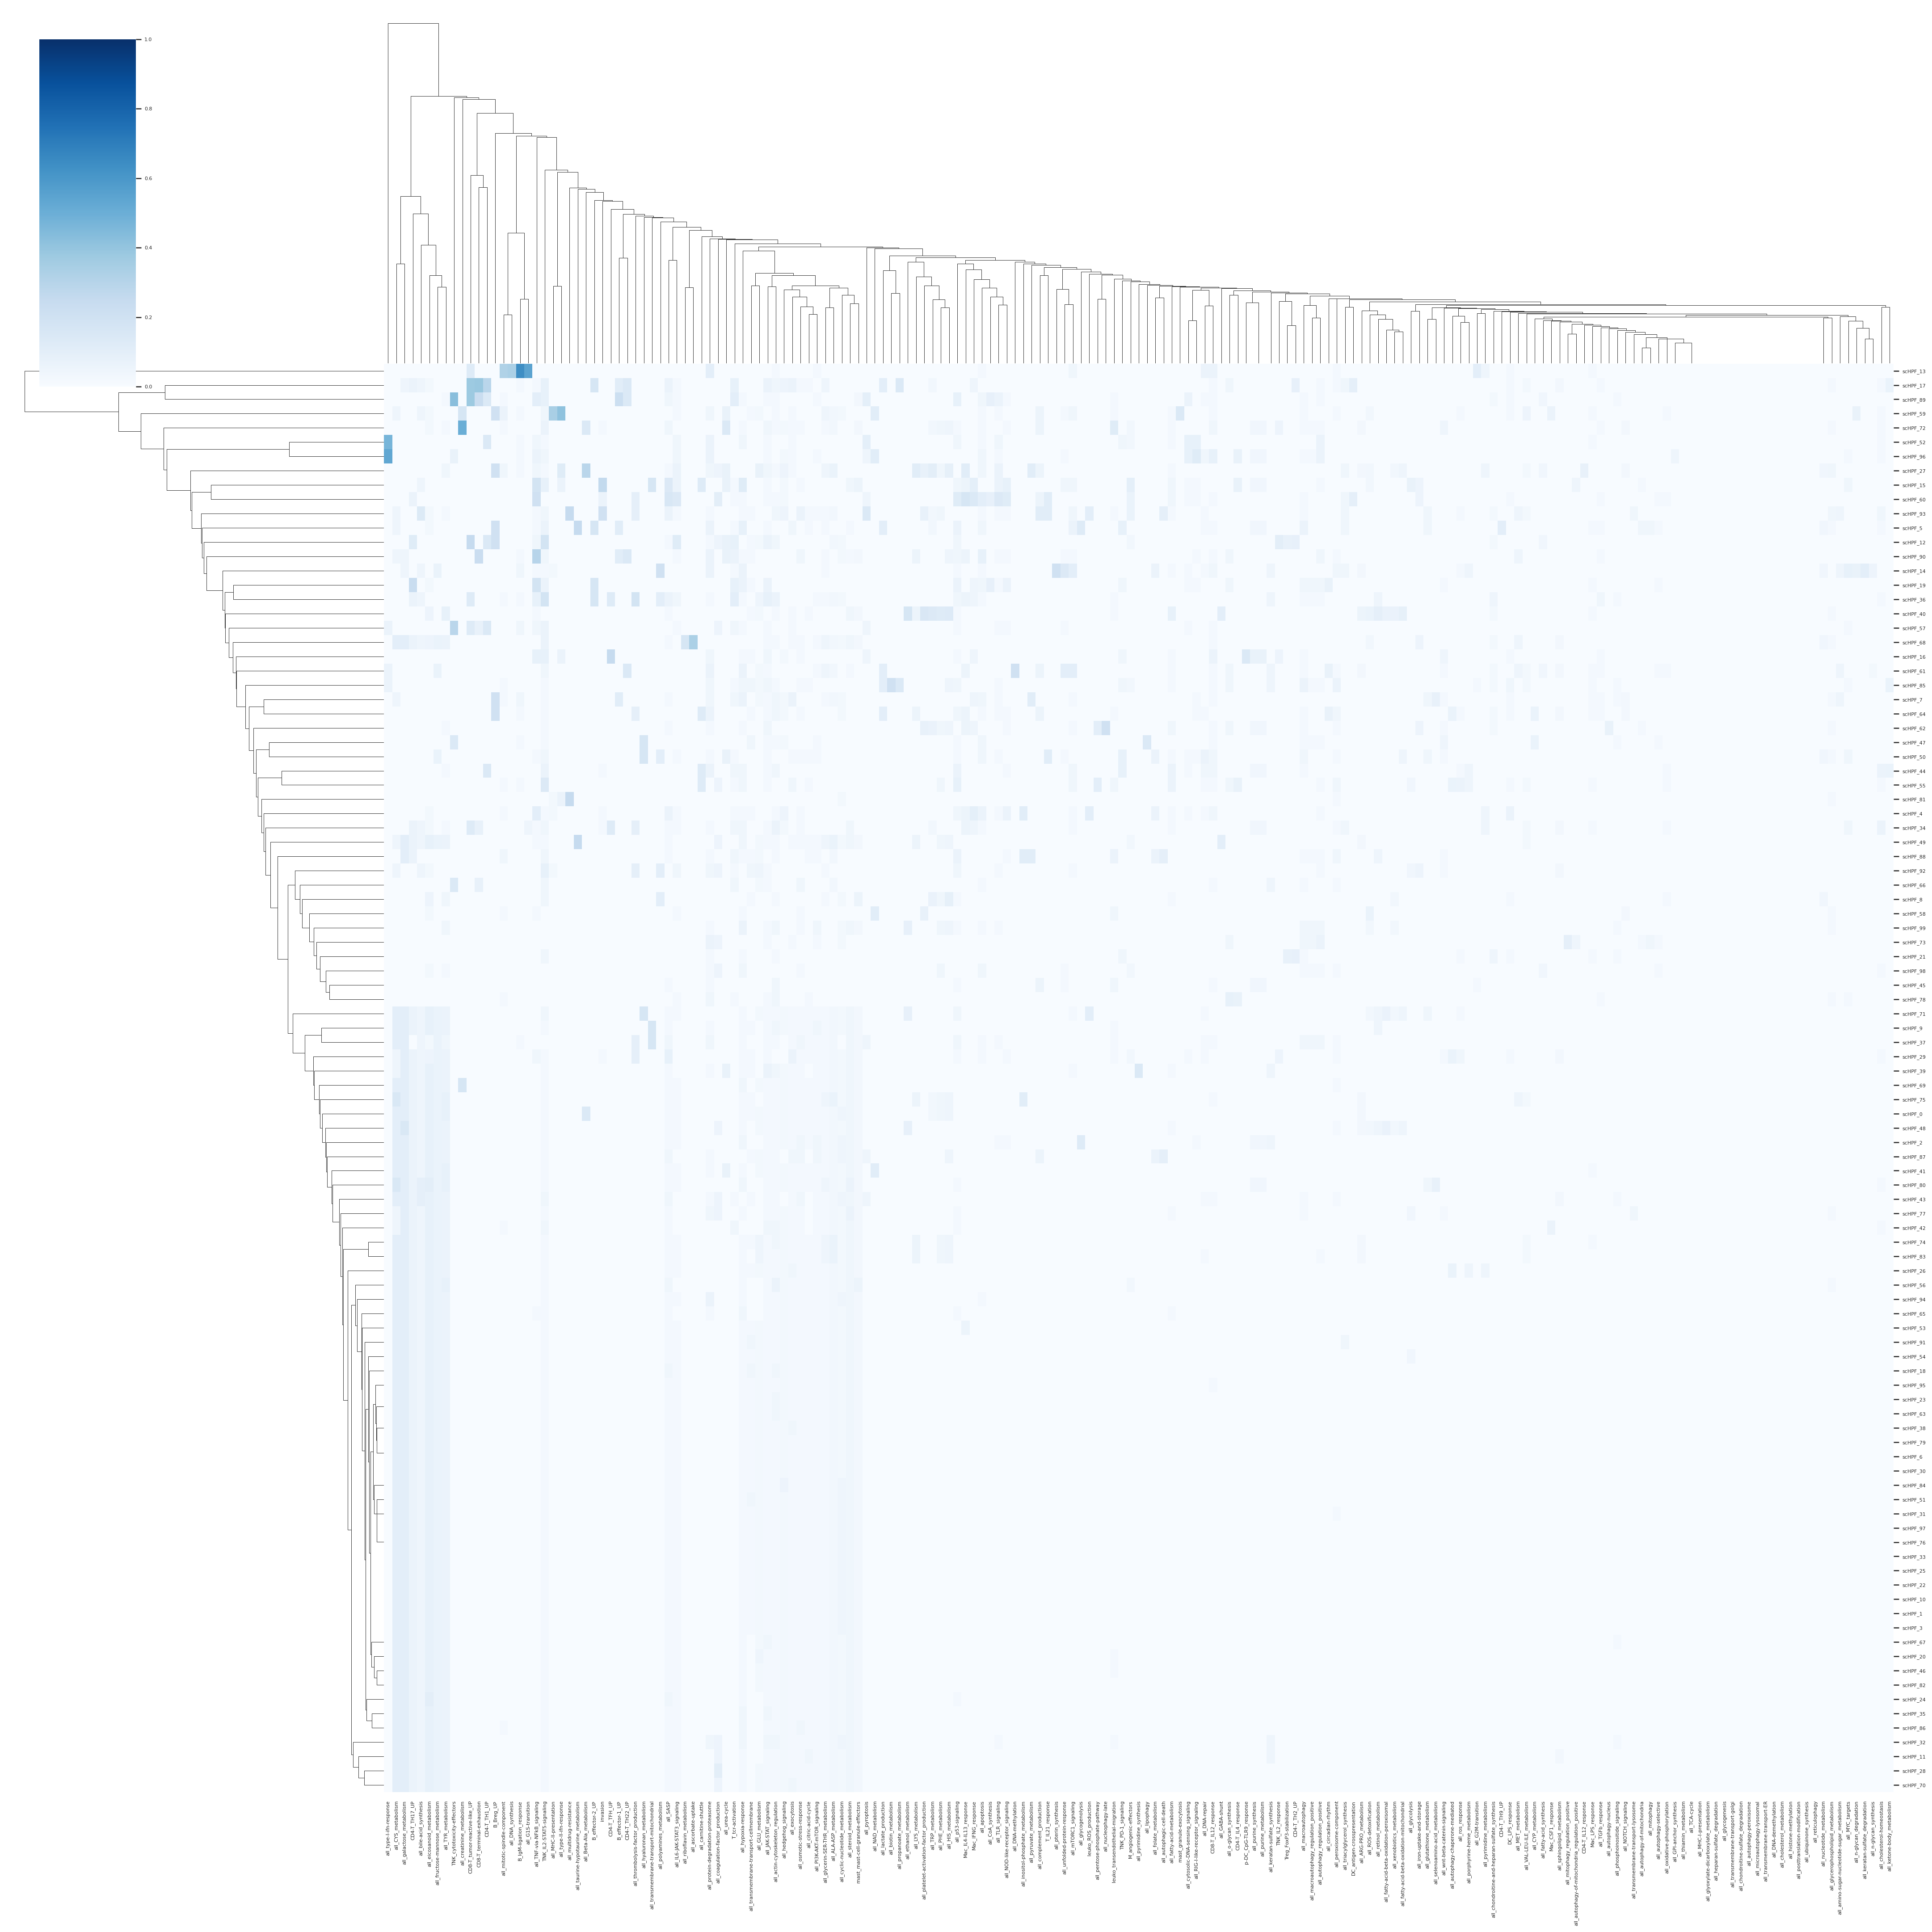

In [117]:
#plot max overlap
save_name = 'scHPF_overlap_map.svg'
sns.set(font_scale=0.5)
sns.clustermap(overlap_df_scHPF,pivot_kws=None, method='average', metric='euclidean', 
           standard_scale=None, figsize=(30, 30), cbar_kws=None, row_cluster=True, 
           col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, 
           col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cmap='Blues',
           cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None,vmin=0,center=0.5,vmax=1)
plt.savefig(fig_save_path + save_name)
print(save_name)

### plot fold change in NR macrophages vs other macrophages and overlap with invasion factor marker genes

In [118]:
#CREATE DF
fold_change = data_plot_mean.loc[0]/data_plot_mean.loc[1]
plot_df = pd.DataFrame([overlap_df_scHPF['invasion'],fold_change],index=['invasion','fold_change']).T
plot_df

invasion  fold_change
scHPF_0       0.00     1.005919
scHPF_1       0.00     1.005864
scHPF_2       0.00     0.994088
scHPF_3       0.00     1.006186
scHPF_4       0.02     0.753574
...            ...          ...
scHPF_95      0.00     1.006085
scHPF_96      0.00     0.224807
scHPF_97      0.00     1.006186
scHPF_98      0.00     1.168227
scHPF_99      0.00     0.787187

[100 rows x 2 columns]

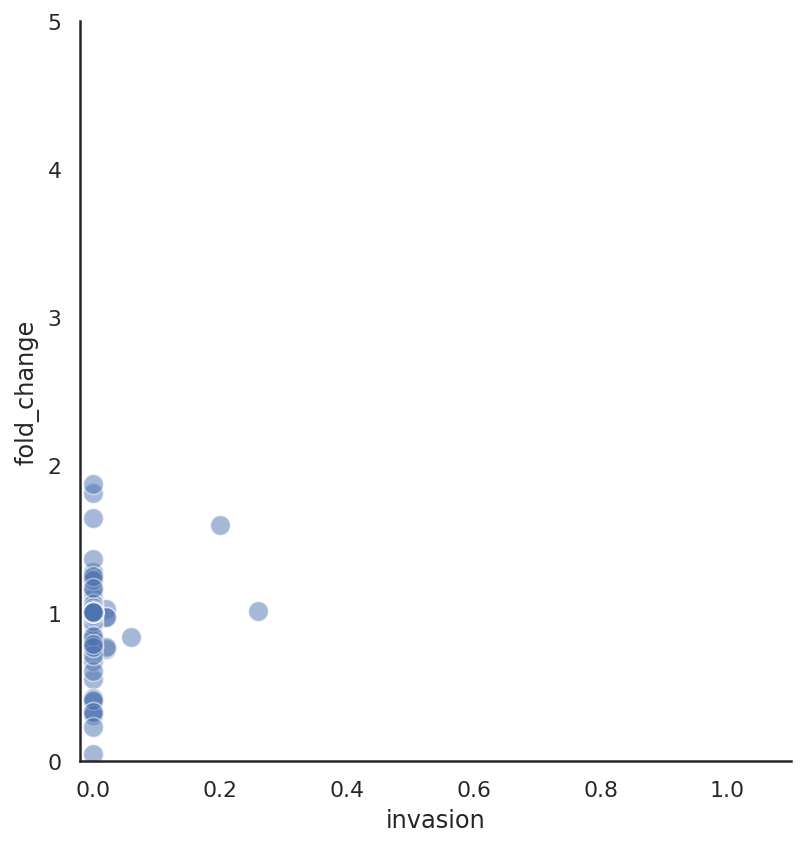

In [119]:
import seaborn as sns
sns.set_theme(style="white")
save_name = 'Bassez_scHPF_invasion_overlap_foldchange.svg'

sns.relplot(x="invasion", y="fold_change",  s=100,
            alpha=0.5,palette=['#000000'],
            height=6, data=plot_df)
plt.xlim(-0.02,1.1)
plt.ylim(0,5)
plt.savefig(fig_save_path + save_name)